In [159]:
import selenium
import pandas as pd
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException

Importing all the required libraries

In [62]:
driver = webdriver.Chrome("/usr/lib/chromium-browser/chromedriver")

We have to connect to the webdriver using the browser application file's path

1. Write a python program which searches all the product under a particular product vertical
from www.amazon.in. The product verticals to be searched will be taken as input from user.
For e.g. If user input is ‘guitar’. Then search for guitars.

In [204]:
driver.get("https://www.amazon.in/")

Open the webpage using the driver

We now inspect the webpage

In [205]:
search_prod = driver.find_element_by_id("twotabsearchtextbox")

We will find the element of product search field.

In [206]:
product_vert = input()

guitars


Taking product vertical as input from the user.

In [207]:
search_prod.send_keys(product_vert)

Passing product value to the search field.

In [208]:
search_btn = driver.find_element_by_id("nav-search-submit-button")

We will find the element of search button to make a product search.

In [209]:
search_btn.click()

Clicking on the search button to get results.

2. In the above question, now scrape the following details of each product listed in first 3 pages
of your search results and save it in a data frame and csv. In case if any product vertical has
less than 3 pages in search results then scrape all the products available under that product
vertical. Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of
Ratings", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details"
and “Product URL”. In case, if any of the details are missing for any of the product then
replace it by “-“.

In [210]:
count = 1
get_urls = []
brand_tags = driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-4']/a")
for i in brand_tags:
    get_urls.append(i.get_attribute('href'))
while(count<3):
    try:
        next_btn = driver.find_element_by_xpath("//li[@class='a-last']")
        next_btn.click()
        driver.refresh()
        brand_tags = driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-4']/a")
        for i in brand_tags:
            get_urls.append(i.get_attribute('href'))
        count+=1
    except NoSuchElementException:
        break

We will take the url for the products from the 3 pages

In [1394]:
get_urls

['https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A07034463U5ZGPIMR2LN4&url=%2FJuarez-Acoustic-Cutaway-038C-Strings%2Fdp%2FB017NPCSLI%2Fref%3Dsr_1_1_sspa%3Fdchild%3D1%26keywords%3Dguitars%26qid%3D1634681611%26sr%3D8-1-spons%26psc%3D1&qualifier=1634681611&id=8609139301213660&widgetName=sp_atf',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A0371095SKHF1AU9NMMI&url=%2FKadence-Frontier-Acoustic-Guitar-Equalizer%2Fdp%2FB01HRIHJWY%2Fref%3Dsr_1_2_sspa%3Fdchild%3D1%26keywords%3Dguitars%26qid%3D1634681611%26sr%3D8-2-spons%26psc%3D1&qualifier=1634681611&id=8609139301213660&widgetName=sp_atf',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A095465029Y2GH23BGOEO&url=%2FJUAREZ-JRZ38C-Acoustic-Sunburst-Strings%2Fdp%2FB01FYYTDTU%2Fref%3Dsr_1_3_sspa%3Fdchild%3D1%26keywords%3Dguitars%26qid%3D1634681611%26sr%3D8-3-spons%26psc%3D1&qualifier=1634681611&

In [217]:
brand_names=[]
product_names=[]
rating_list=[]
no_ratings=[]
price_list=[]
return_list=[]
expctd_del_dates=[]
availabilities=[]
other_details=[]
urls=[]

Declaring empty list for all the required features

In [231]:
def get_details(brand_names,product_names,rating_list,no_ratings,price_list,return_list,expctd_del_dates,availabilities,other_details,urls):
    try:
        brand_name = driver.find_element_by_xpath("//td[@class='a-span9']")
        brand_names.append(brand_name.text)
    except NoSuchElementException:
        brand_names.append("-")
    try:
        product_name = driver.find_element_by_id("productTitle")
        product_names.append(product_name.text)
    except NoSuchElementException:
        product_names.append("-")
    try:
        rating = driver.find_element_by_id("acrPopover")
        rating = rating.get_attribute("textContent")
        rating_list.append(rating.replace("\n",""))
    except NoSuchElementException:
        rating_list.append("-")
    try:
        no_rating = driver.find_element_by_id("acrCustomerReviewText")
        no_ratings.append(no_rating.text)
    except NoSuchElementException:
        no_ratings.append("-")
    try:
        price = driver.find_element_by_xpath("//td[@class='a-span12']")
        price_list.append(price.text)
    except NoSuchElementException:
        price_list.append("-")
    try:
        return_ex = driver.find_element_by_id("RETURNS_POLICY")
        return_list.append(return_ex.text)
    except NoSuchElementException:
        return_list.append("-")
    try:
        expctd_delivery = driver.find_element_by_xpath("//div[@class='a-section a-spacing-mini']/b")
        expctd_del_dates.append(expctd_delivery.text)
    except NoSuchElementException:
        expctd_del_dates.append("-")
    try:
        availability = driver.find_element_by_id("availability")
        availabilities.append(availability.text)
    except NoSuchElementException:
        availabilities.append("-")
    try:
        other_detail = driver.find_element_by_id("productOverview_feature_div")
        if other_detail.text:
            other_details.append(other_detail.text.replace("\n","."))
        else:
            other_details.append("-")
    except NoSuchElementException:
        other_details.append("-")
    

Defining a function to collect features data from the urls. 

In [219]:
for i in get_urls:
    driver.get(i)
    get_details(brand_names,product_names,rating_list,no_ratings,price_list,return_list,expctd_del_dates,availabilities,other_details,urls)

We loop through all the urls and run the driver for each url to collect the feature data.

In [224]:
df = pd.DataFrame({"Brand Name":brand_names,
                   "Product Name":product_names,
                   "Rating":rating_list,
                   "Number of ratings":no_ratings,
                   "Price":price_list,
                   "Return/Exchange":return_list,
                   "Expected Delivery Date":expctd_del_dates,
                   "Availablility":availabilities,
                   "Other Details":other_details,
                   "Urls":get_urls})

In [229]:
df

,Brand Name,Product Name,Rating,Number of ratings,Price,Return/Exchange,Expected Delivery Date,Availablility,Other Details,Urls
0,Juârez,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C with Bag, Strings, Pick and Strap, Black",\n\n\n\n4.0 out of 5 stars\n\n\n\n\n,"13,307 ratings","₹1,999.00",7 Days Replacement,"Sunday, Oct 24",In stock.,"Brand Juârez.Colour Black.Body Material Wood.Back Material Type Plastic, Wood, Ebony, Basswood.Fretboard Material Type Ebony",https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A07034463U5ZGPIMR2LN4&url=%2FJuarez-Acoustic-Cutaway-038C-Strings%2Fdp%2FB017NPCSLI%2Fref%3Dsr_1_1_sspa%3Fdchild%3D1%26keywords%3Dguitars%26qid%3D1634681611%26sr%3D8-1-spons%26psc%3D1&qualifier=1634681611&id=8609139301213660&widgetName=sp_atf
1,Kadence,"Kadence Frontier Jumbo Semi Acoustic Guitar With Die Cast Keys,Super Combo (Bag, 1 pack Strings, Strap, Picks, Capo, Tuner (black & stand)",\n\n\n\n3.9 out of 5 stars\n\n\n\n\n,"1,042 ratings","₹6,599.00",7 Days Replacement,"Tuesday, Oct 26",In stock.,Brand Kadence.Colour Black.Body Material Rosewood.Back Material Type Rosewood.Neck Material Type Spruce Wood,https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A0371095SKHF1AU9NMMI&url=%2FKadence-Frontier-Acoustic-Guitar-Equalizer%2Fdp%2FB01HRIHJWY%2Fref%3Dsr_1_2_sspa%3Fdchild%3D1%26keywords%3Dguitars%26qid%3D1634681611%26sr%3D8-2-spons%26psc%3D1&qualifier=1634681611&id=8609139301213660&widgetName=sp_atf
2,JUAREZ,"Juarez Acoustic Guitar Kit, 38 Inch Cutaway, 38C with Bag, Strings, Pick and Strap, 3TS Sunburst",\n\n\n\n4.0 out of 5 stars\n\n\n\n\n,"4,345 ratings","₹1,999.00",7 Days Replacement,"Wednesday, Oct 27",In stock.,Brand JUAREZ.Colour Sunburst.Body Material Wood.Back Material Type Blackwood.Neck Material Type Lindenwood,https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A095465029Y2GH23BGOEO&url=%2FJUAREZ-JRZ38C-Acoustic-Sunburst-Strings%2Fdp%2FB01FYYTDTU%2Fref%3Dsr_1_3_sspa%3Fdchild%3D1%26keywords%3Dguitars%26qid%3D1634681611%26sr%3D8-3-spons%26psc%3D1&qualifier=1634681611&id=8609139301213660&widgetName=sp_atf
3,JUAREZ,"JUAREZ JRZ38CTR/BK 38 Inch Acoustic Guitar with Dual Action Truss Rod, Bag, Picks, Allen Key, Extra String Set, Black",\n\n\n\n3.7 out of 5 stars\n\n\n\n\n,181 ratings,"₹2,999.00",7 Days Replacement,"Tuesday, Oct 26",In stock.,"Brand JUAREZ.Colour Black.Body Material Linden.Back Material Type Alloy Steel, Wood, Acrylonitrile Butadiene Styrene, Basswood.Guitar Pickup Configuration Combination",https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A0913107YWHGUIB89Z77&url=%2FJUAREZ-JRZ38CTR-BK-Acoustic-Guitar%2Fdp%2FB08FTZK7H8%2Fref%3Dsr_1_4_sspa%3Fdchild%3D1%26keywords%3Dguitars%26qid%3D1634681611%26smid%3DA14CZOWI0VEHLG%26sr%3D8-4-spons%26psc%3D1&qualifier=1634681611&id=8609139301213660&widgetName=sp_atf
4,Juârez,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C with Bag, Strings, Pick and Strap, Black",\n\n\n\n4.0 out of 5 stars\n\n\n\n\n,"13,307 ratings","₹1,999.00",7 Days Replacement,"Sunday, Oct 24",In stock.,"Brand Juârez.Colour Black.Body Material Wood.Back Material Type Plastic, Wood, Ebony, Basswood.Fretboard Material Type Ebony",https://www.amazon.in/Juarez-Acoustic-Cutaway-038C-Strings/dp/B017NPCSLI/ref=sr_1_5?dchild=1&keywords=guitars&qid=1634681611&qsid=257-2142992-9124456&sr=8-5&sres=B017NPCSLI%2CB01FYYTDS6%2CB01FYYTDTU%2CB073B6TQQY%2CB076QHZ4HZ%2CB072MFK4L6%2CB076QGY91P%2CB01GDZ46AA%2CB076T3RHMG%2CB078GTJP5Y%2CB01FYYTDW2%2CB075XMRKMY%2CB07KXNKLJ2%2CB089GNM189%2CB07X1J4D3Z%2CB07VHRWV4R%2CB098BCCY75%2CB08Y7LMRBR%2CB072JTPNZC%2CB07K9497RC&srpt=GUITARS
...,...,...,...,...,...,...,...,...,...,...
179,-,Layfuz 6 String 6 Fret Model Portable Pocket Guitar Neck Chord Trainer Guitar Practice Tool for Trainer Beginner Black,-,-,-,7 Days Replacement,-,,,https://www.amazon.in/Layfuz-Portable-Trainer-Practice-Beginner/dp/B09B

We will create the dataframe for the features.

In [228]:
pd.options.display.max_colwidth = 1000

3. Write a python program to access the search bar and search button on images.google.com and
scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’.

In [233]:
driver.get("https://images.google.com/")

Goto the google images page using driver

In [234]:
search_key = driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
search_key

<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="4bb22491-d945-44f6-b42f-7b4e1ff18557")>

In [235]:
search_key.send_keys("fruits")

Find the search box element and send required search value to the search box.

In [236]:
search_btn = driver.find_element_by_xpath("//button[@class='Tg7LZd']")
search_btn

<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="ba9f0b55-cfba-4adc-a01e-8810f3aca4e1")>

In [237]:
search_btn.click()

Find the search button element and click it.

In [241]:
fruit_tags = driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
fruit_tags = fruit_tags[:100]
fruit_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="d1445668-72a7-4714-b226-c47d27ea8024")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="4265241a-2ac1-4d08-8820-046e8f0f7ed2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="c40096bc-d050-471c-a3d3-2d5ea9e2d893")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="1c4e6e40-e7c4-4adb-915e-6f3d4ce5c6c6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="0ba5946d-e0bb-4c5f-9fb9-4f2f3ea1cf02")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="3a666615-d69c-4e5c-b89a-3e12be1e23cc")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="0bae9f1a-a891-4865-92a9-66

We find the fruits photo element from the webpage

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR7ncSS-XDDAIMBvfeeZG-1XZ8eZz4xnu79Rg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTIZ86jV3Ny7rYn7aDvHpOEItGZmuosD3dVRA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTBJUrYiKaStYk6Z8F4RGBa5UEOTxt9ycchIQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSsZyKU4pEUcVP2x_GtXrgZ8kRbLhim4vwD5Q&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSQeG-FwVV4glgoGZR-cVTzS5Og26wIT6Hf3g&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQRfsCgcFwJCPGe-lJBHItC_dJmbArrdNAeCg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRWk7ZH0-110K8lEiiRNFuEbQxEPHVM1quyJQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT68b0O5wgNnMvg2hrPVjD4cRADRiFNcmXHvQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTwmbjWK_eeyo
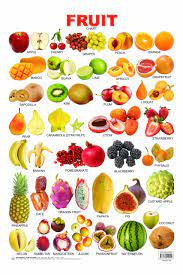
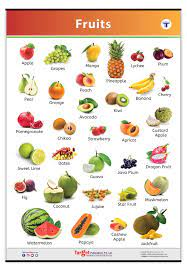
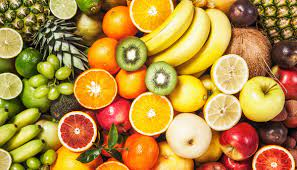
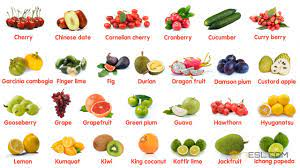
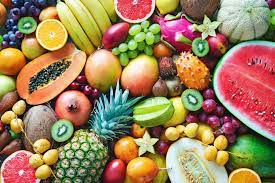
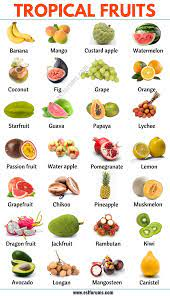
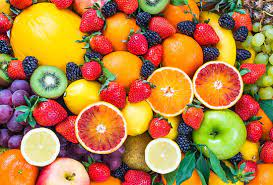
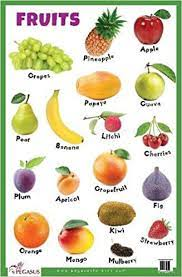
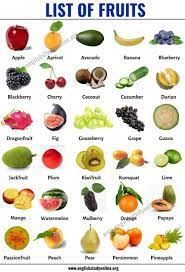
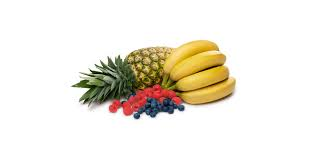
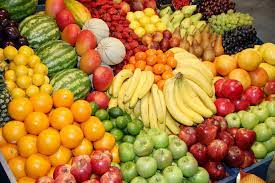
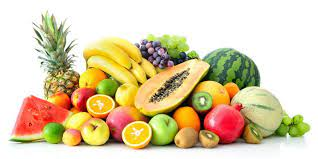
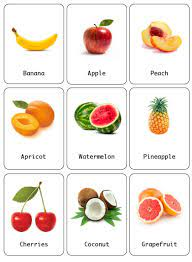
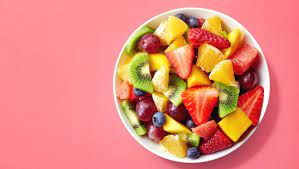
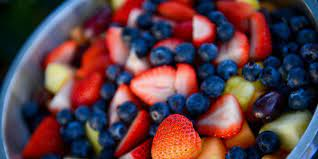
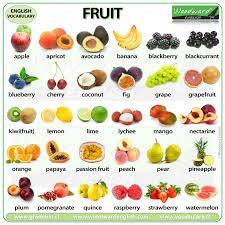
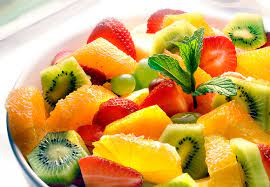
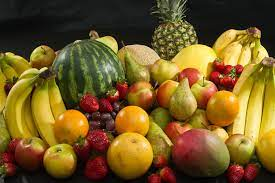
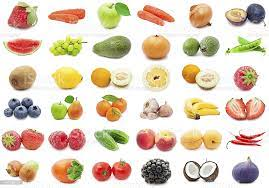
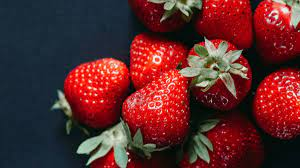

In [242]:
fruit_images = []
for i in fruit_tags:
    fruit_images.append(i.get_attribute("src"))
fruit_images

Now we find the base64 image data from the elements.

We repeat the above steps to find the elements of car and machine learning images and then collect them in lists

In [265]:
search_key = driver.find_element_by_xpath("//input[@class='og3lId']")
search_key

<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="34e93ca2-0fc5-4106-a039-012424ea5d94")>

In [267]:
search_key.clear()
search_key.send_keys("cars")

In [269]:
search_btn = driver.find_element_by_xpath("//button[@class='rCGXm']")
search_btn

<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="a28c7b72-c722-44fe-a4f8-47ce0b183db5")>

In [271]:
search_btn.click()

In [272]:
car_tags = driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
car_tags = car_tags[:100]
car_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="8fa81943-0669-49ad-8c04-a91a1e36801d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="4a7e0610-41f9-4ca4-80f2-3ba7a3e649c4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="52a3b5ca-7cd7-4fc9-8d73-42dd99f61409")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="90991ef2-0960-469c-9ca6-60d2485f136d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="ded2ef28-3849-4b77-a17a-2c9651dabc9a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="c5a6d566-967d-45c1-bdd2-b81d2588fad3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="211f6057-67ff-49ae-a990-ef

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTkwGXQDS6Q-IVLhKWrdyaHw8WYNgWTE2juJQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTqaUnBv1dqQEFA_lVjksvS1L5EG8eeI374iA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPTXYOJCG-NmDxyu_Rzo6oO5OMgCdRWgTkkA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTyejoDmoNx02SsCNHE9Ff5FjTwzOOlG1z78w&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ858OGA45WJgcqml9d0GEzZtWzyVkIbANYpg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSRHyK4sJ-9lsYzszahONDb6vL5gnliy1kN9Q&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR9IsBmBE_Mvr5Zlk1dNL6LXxuhwMcLIvVCig&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRm5bry8IRa6hsiwr-WmKOo_bbdPZF-MxE0_g&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTkoEVfwcUsb7
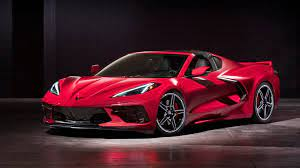
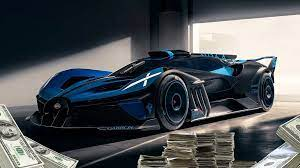
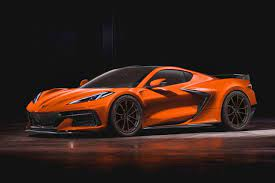
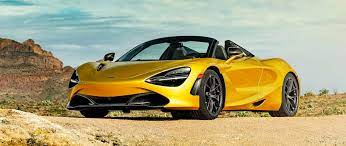
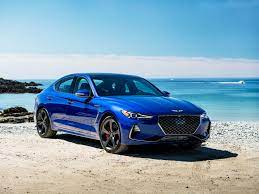
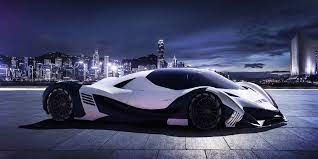
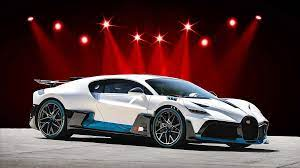
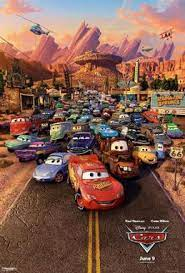
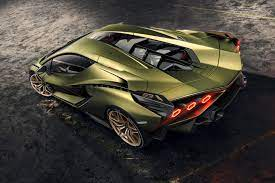
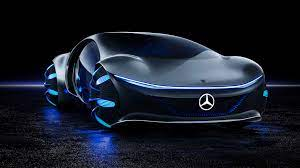
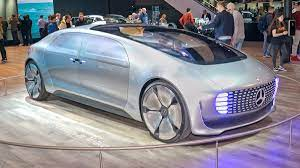
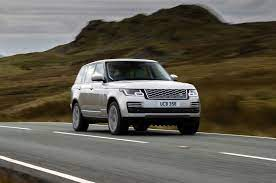
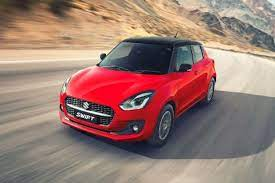
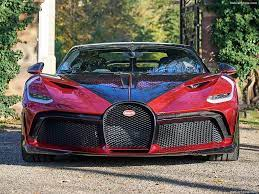
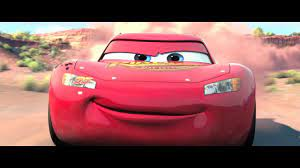
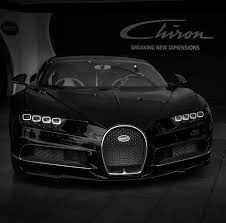
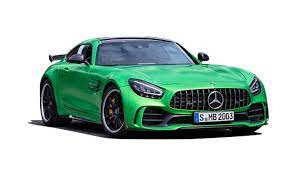
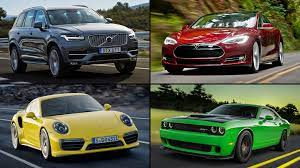
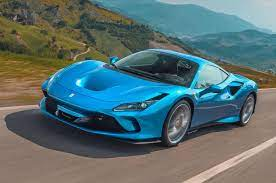
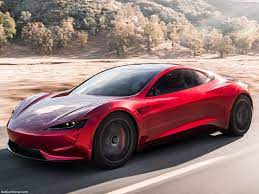

In [273]:
car_images = []
for i in car_tags:
    car_images.append(i.get_attribute("src"))
car_images

In [274]:
search_key = driver.find_element_by_xpath("//input[@class='og3lId']")
search_key

<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="4929601e-8cd5-4995-aa4f-b28decc4e660")>

In [276]:
search_key.clear()
search_key.send_keys("Machine Learning")

In [278]:
search_btn = driver.find_element_by_xpath("//button[@class='rCGXm']")
search_btn

<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="cf89e904-689b-467c-b388-81a861e9ee9c")>

In [279]:
search_btn.click()

In [280]:
ml_tags = driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
ml_tags = ml_tags[:100]
ml_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="182b3b9f-9ac0-43bf-874a-2999ebd5bfc6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="ff423f5a-de2e-4fc1-ab04-4e3244fb25fc")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="71da9bb8-9120-4fb9-a46e-20efa916f463")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="b9e96d8c-fbfc-4ec4-a5f6-996c15bfb771")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="d97b42c7-8c6d-47bd-8430-57145c4b4ade")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="15648f33-69e6-40e7-9b19-5184ec2f67f5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="838007b9-da76-41d4-a55d-74

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRn2OwSlEF65xXRZ9C4IT80ETGgSG3pERmvkg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQfN12oiCbkM3yQNEyPU1BU2oWCHh3gEGKNcA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSSIIhfDiSiaET_Kibxl7Jr8lFm5ki3R5_O3g&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRvrLOYzDpbFNPnpVcM10KGQWzibR5O9MAGcA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQrT3TniqvNeIBy5HpWmHVNDtmn1TazaB45wA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQSYylHvRw4uZOGozJG1VYgdMReGDGuxSwxPQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRqX-g9A6tbPAlpj85G-no0fk7A3xH1wFUcyQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTjgKHj3E1DfDUvTtMbEX8PJ9ucAkuIhyAM4Q&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTlrRupcFP48c
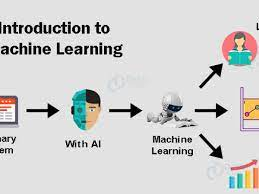
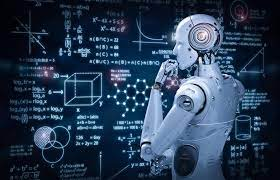
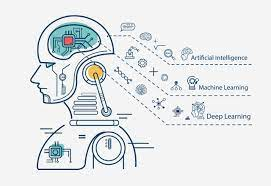
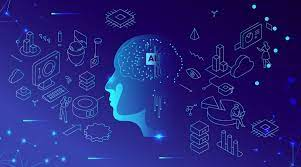
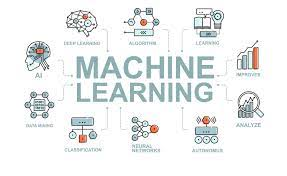
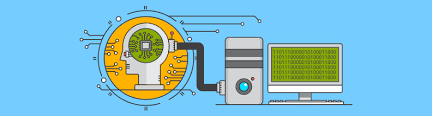
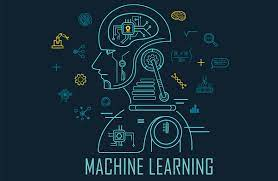
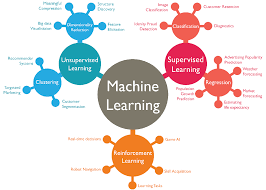
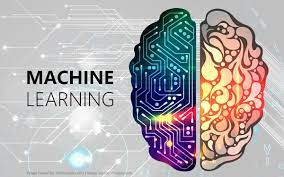
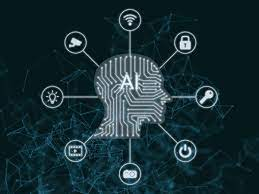
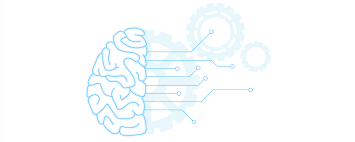
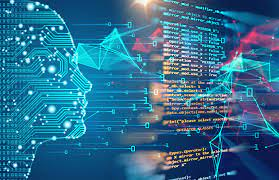
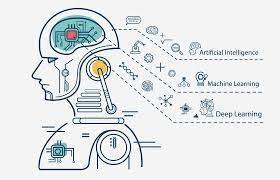
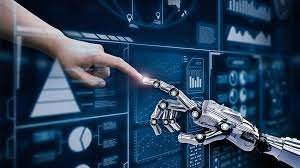
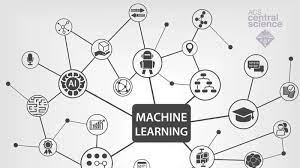
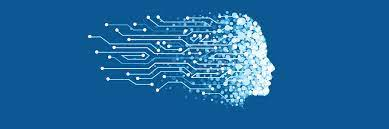
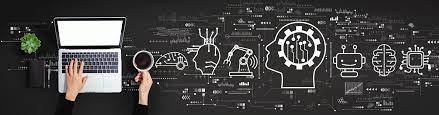
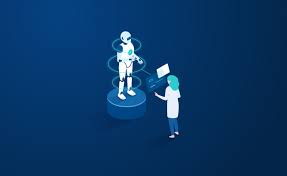
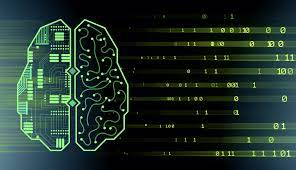
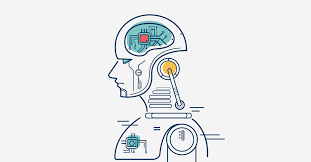

In [281]:
ml_images = []
for i in ml_tags:
    ml_images.append(i.get_attribute("src"))
ml_images

4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on
www.flipkart.com and scrape following details for all the search results displayed on 1 st page.
Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”,
“Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display
Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”.
Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe
and CSV.

In [1413]:
driver.get("https://www.flipkart.com")

Get the required web page using driver.

In [1414]:
search_key = driver.find_element_by_xpath("//input[@class='_3704LK']")
search_key

<selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="a8d02f27-d159-40cd-9137-b5ed3c331413")>

In [1415]:
search_key.send_keys("smartphone")

Find the search box element and send required search value to the search box.

In [1416]:
search_btn = driver.find_element_by_xpath("//button[@class='L0Z3Pu']")
search_btn.click()

Find the search button element and click it.

In [1400]:
url_tags = driver.find_elements_by_xpath("//a[@class='_1fQZEK']")
url_tags

[<selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="e09b6ecd-ee34-4c66-a34d-c77ae818084c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="7eadf5bb-9570-49d1-a454-eb307795693d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="032fa748-18af-4f92-9074-b97a600263b0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="4272de67-3d3f-458b-8019-337891465a17")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="9dc63995-1d40-4b74-b3f8-897f87b9be98")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="55590711-0803-461c-9afa-a725bf45f1c5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="868a2273-efc0-4a3f-a909-dc

find the url elements for all the products

In [1401]:
url_list = []
for i in url_tags:
    url_list.append(i.get_attribute("href"))
url_list

['https://www.flipkart.com/realme-c21y-cross-blue-64-gb/p/itm2a2e4f7554a21?pid=MOBG5ZGKRUBBZFBR&lid=LSTMOBG5ZGKRUBBZFBRXORTMH&marketplace=FLIPKART&q=smartphone&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=SEARCH&iid=81b9c94b-3592-4002-b8d1-4ffb34220551.MOBG5ZGKRUBBZFBR.SEARCH&ppt=hp&ppn=homepage&ssid=axabrm32xc0000001635172382254&qH=1036ba3c4ed2c021',
 'https://www.flipkart.com/realme-c21y-cross-blue-32-gb/p/itm2a2e4f7554a21?pid=MOBG5ZGKXCGFB9HP&lid=LSTMOBG5ZGKXCGFB9HP72DW1X&marketplace=FLIPKART&q=smartphone&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=SEARCH&iid=81b9c94b-3592-4002-b8d1-4ffb34220551.MOBG5ZGKXCGFB9HP.SEARCH&ppt=hp&ppn=homepage&ssid=axabrm32xc0000001635172382254&qH=1036ba3c4ed2c021',
 'https://www.flipkart.com/realme-c21y-cross-black-64-gb/p/itm2a2e4f7554a21?pid=MOBG5ZGKQVSRBYGJ&lid=LSTMOBG5ZGKQVSRBYGJZUGRLX&marketplace=FLIPKART&q=smartphone&store=tyy%2F4io&srno=s_1_3&otracker=search&otracker1=search&fm=SEARCH&iid=81b9c94b-3592-4002-b8

Collect the urls for all the products

In [1402]:
driver.get(url_list[0])

We go the url of the first listed product

In [1403]:
details_btn = driver.find_element_by_xpath("//button[@class='_2KpZ6l _1FH0tX']")
details_btn.click()

We find the element for details button and click on it.

In [1404]:
brand_name = driver.find_element_by_xpath("//span[@class='B_NuCI']")
brand_name = brand_name.text
brand = brand_name[:brand_name.find(" ")]

We find the brand name element and find the brand name data

In [357]:
product_name = driver.find_element_by_xpath("//span[@class='B_NuCI']")
product_name.text

'realme C21Y (Cross Blue, 64 GB)  (4 GB RAM)'

We find all the other data features.

In [358]:
color = driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[1]/table/tbody/tr[4]/td[2]")
color.text

'Cross Blue'

In [359]:
ram = driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[4]/table/tbody/tr[2]/td[2]")
ram.text

'4 GB'

In [360]:
rom = driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[4]/table/tbody/tr[1]/td[2]")
rom.text

'64 GB'

In [361]:
prim_cam = driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[5]/table/tbody/tr[2]/td[2]")
prim_cam.text

'13MP + 2MP + 2MP'

In [362]:
sec_cam = driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[5]/table/tbody/tr[5]/td[2]")
sec_cam.text

'5MP Front Camera'

In [363]:
disp_size = driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[2]/table/tbody/tr[1]/td[2]")
disp_size.text

'16.51 cm (6.5 inch)'

In [364]:
disp_res = driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[2]/table/tbody/tr[2]/td[2]")
disp_res.text

'1600 x 720 Pixels'

In [365]:
processor = driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[3]/table/tbody/tr[2]/td[2]")
processor.text

'Unisoc T610'

In [366]:
cores = driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[3]/table/tbody/tr[3]/td[2]")
cores.text

'Octa Core'

In [367]:
battery_capacity = driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[9]/table/tbody/tr/td[2]")
battery_capacity.text

'5000 mAh'

In [368]:
price = driver.find_element_by_xpath("//div[@class='_30jeq3 _16Jk6d']")
price.text

'₹9,999'

In [406]:
brand_names = []
product_names = []
color_list = []
ram_list = []
rom_list = []
prim_cam_list = []
sec_cam_list = []
disp_size_list = []
disp_res_list = []
processor_list = []
cores_list = []
battery_capacity_list = []
price_list = []

We create empty list for all the data features

In [407]:
def get_details(brand_names,
                product_names,
                colour_list,
                ram_list,
                rom_list,
                prim_cam_list,
                sec_cam_list,
                disp_size_list,
                disp_res_list,
                processor_list,
                cores_list,
                battery_capacity_list,
                price_list):
    
    details_btn = driver.find_element_by_xpath("//button[@class='_2KpZ6l _1FH0tX']")
    details_btn.click()
    brand_name = ""
    try:
        brand_name = driver.find_element_by_xpath("//span[@class='B_NuCI']")
        brand_name = brand_name.text
        brand_name = brand_name[:brand_name.find(" ")]
        brand_names.append(brand_name)
    except NoSuchElementException:
        brand_names.append("-")
    try:
        product_name = driver.find_element_by_xpath("//span[@class='B_NuCI']")
        product_names.append(product_name.text)
    except NoSuchElementException:
        brand_names.append("-")
    try:
        color = driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[1]/table/tbody/tr[4]/td[2]")
        color_list.append(color.text)
    except NoSuchElementException:
        color_list.append("-")
    try:
        ram = driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[4]/table/tbody/tr[2]/td[2]")
        ram_list.append(ram.text)
    except NoSuchElementException:
        ram_list.append("-")
    try:
        rom = driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[4]/table/tbody/tr[1]/td[2]")
        rom_list.append(rom.text)
    except NoSuchElementException:
        rom_list.append("-")
    try:
        prim_cam = driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[5]/table/tbody/tr[2]/td[2]")
        prim_cam_list.append(prim_cam.text)
    except NoSuchElementException:
        prim_ca._list.append("-")
    try:
        sec_cam = driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[5]/table/tbody/tr[5]/td[2]")
        sec_cam_list.append(sec_cam.text)
    except NoSuchElementException:
        sec_cam_list.append("-")
    try:
        disp_size = driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[2]/table/tbody/tr[1]/td[2]")
        disp_size_list.append(disp_size.text)
    except NoSuchElementException:
        disp_size_list.append("-")
    try:
        disp_res = driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[2]/table/tbody/tr[2]/td[2]")
        disp_res_list.append(disp_res.text)
    except NoSuchElementException:
        disp_res_list.append("-")
    try:
        processor = driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[3]/table/tbody/tr[2]/td[2]")
        processor_list.append(processor.text)
    except NoSuchElementException:
        processor_list.append("-")
    try:
        cores = driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[3]/table/tbody/tr[3]/td[2]")
        cores_list.append(cores.text)
    except NoSuchElementException:
        cores_list.append("-")
    try:
        battery_capacity = driver.find_element_by_xpath("//div[@class='_2418kt']/ul/li[4]")
        if brand_name=="APPLE":
            battery_capacity_list.append("-")
        else:
            battery_capacity_list.append(battery_capacity.text)
    except NoSuchElementException:
        battery_capacity_list.append("-")
    try:
        price = driver.find_element_by_xpath("//div[@class='_30jeq3 _16Jk6d']")
        price_list.append(price.text)
    except NoSuchElementException:
        price_list.append("-")

We find the data features for all the products and use the above function to do so. 

In this function there may be many data features without an element (i.e, they are not available). Therefore to avoid error we use try and except block to handle the exceptions

In [408]:
for i in url_list:
    driver.get(i)
    get_details(brand_names,product_names,color_list,ram_list,rom_list,prim_cam_list,sec_cam_list,disp_size_list,disp_res_list,processor_list,cores_list,battery_capacity_list,price_list)

We loop through the urls and go to each url using driver and get the details in feature lists.

In [409]:
df = pd.DataFrame({"Brand Name":brand_names,
                   "Product Name":product_names,
                   "Color":color_list,
                   "RAM":ram_list,
                   "ROM":rom_list,
                   "Primary Camera":prim_cam_list,
                   "Secondary Camera":sec_cam_list,
                   "Display Resolution":disp_res_list,
                   "Processor":processor_list,
                   "Processor Cores":cores_list,
                   "Battery Capacity":battery_capacity_list,
                   "Price":price_list,
                   "Product URL":url_list})

Creating dataframe for the data features

In [410]:
df

,Brand Name,Product Name,Color,RAM,ROM,Primary Camera,Secondary Camera,Display Resolution,Processor,Processor Cores,Battery Capacity,Price,Product URL
0,realme,"realme C21Y (Cross Blue, 64 GB) (4 GB RAM)",Cross Blue,4 GB,64 GB,13MP + 2MP + 2MP,5MP Front Camera,1600 x 720 Pixels,Unisoc T610,Octa Core,5000 mAh Battery,"₹9,999",https://www.flipkart.com/realme-c21y-cross-blue-64-gb/p/itm2a2e4f7554a21?pid=MOBG5ZGKRUBBZFBR&lid=LSTMOBG5ZGKRUBBZFBRXORTMH&marketplace=FLIPKART&q=smartphone&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=SEARCH&iid=28739068-7d36-4b21-8f58-0be9450829d1.MOBG5ZGKRUBBZFBR.SEARCH&ppt=hp&ppn=homepage&ssid=brcatfnd000000001634849307449&qH=1036ba3c4ed2c021
1,realme,"realme C11 2021 (Cool Grey, 32 GB) (2 GB RAM)",Cool Grey,2 GB,32 GB,8MP Rear Camera,5MP Front Camera,1600 x 720 Pixels,Octa-core,Octa Core,5000 mAh Battery,"₹6,599",https://www.flipkart.com/realme-c11-2021-cool-grey-32-gb/p/itmbd856acb97c38?pid=MOBG4BEGX8QYNKGZ&lid=LSTMOBG4BEGX8QYNKGZMUPPAI&marketplace=FLIPKART&q=smartphone&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=SEARCH&iid=28739068-7d36-4b21-8f58-0be9450829d1.MOBG4BEGX8QYNKGZ.SEARCH&ppt=hp&ppn=homepage&ssid=brcatfnd000000001634849307449&qH=1036ba3c4ed2c021
2,realme,"realme C11 2021 (Cool Blue, 32 GB) (2 GB RAM)",Cool Blue,2 GB,32 GB,8MP Rear Camera,5MP Front Camera,1600 x 720 Pixels,Octa-core,Octa Core,5000 mAh Battery,"₹6,599",https://www.flipkart.com/realme-c11-2021-cool-blue-32-gb/p/itmbd856acb97c38?pid=MOBG4BEG3HG78BDG&lid=LSTMOBG4BEG3HG78BDGLL8WZW&marketplace=FLIPKART&q=smartphone&store=tyy%2F4io&srno=s_1_3&otracker=search&otracker1=search&fm=SEARCH&iid=28739068-7d36-4b21-8f58-0be9450829d1.MOBG4BEG3HG78BDG.SEARCH&ppt=hp&ppn=homepage&ssid=brcatfnd000000001634849307449&qH=1036ba3c4ed2c021
3,OPPO,"OPPO A54 (Moonlight Gold, 64 GB) (4 GB RAM)",Moonlight Gold,4 GB,64 GB,13MP + 2MP + 2MP,16MP Front Camera,1600 x 720 Pixels,MediaTek Helio P35,Octa Core,5000 mAh Lithium-ion Polymer Battery,"₹14,990",https://www.flipkart.com/oppo-a54-moonlight-gold-64-gb/p/itm2c71eaacf710e?pid=MOBG23KTPZCR9ZA3&lid=LSTMOBG23KTPZCR9ZA3PACQPB&marketplace=FLIPKART&q=smartphone&store=tyy%2F4io&srno=s_1_4&otracker=search&otracker1=search&fm=SEARCH&iid=en_9JTkIRyDig7m6RxjxmT0sPbR3n1iz5tGvwbMsAZ9C4YJdnq9ztGP0P6goBeDaRAtBKyEVohPrucwoqFdJVj0cA%3D%3D&ppt=hp&ppn=homepage&ssid=brcatfnd000000001634849307449&qH=1036ba3c4ed2c021
4,realme,"realme C11 2021 (Cool Blue, 64 GB) (4 GB RAM)",Cool Blue,4 GB,64 GB,8MP Rear Camera,5MP Front Camera,1600 x 720 Pixels,Octa-core,Octa Core,5000 mAh Battery,"₹7,999",https://www.flipkart.com/realme-c11-2021-cool-blue-64-gb/p/itmbd856acb97c38?pid=MOBG5BCDBHPYMT5B&lid=LSTMOBG5BCDBHPYMT5BR54QOY&marketplace=FLIPKART&q=smartphone&store=tyy%2F4io&srno=s_1_5&otracker=search&otracker1=search&fm=SEARCH&iid=28739068-7d36-4b21-8f58-0be9450829d1.MOBG5BCDBHPYMT5B.SEARCH&ppt=hp&ppn=homepage&ssid=brcatfnd000000001634849307449&qH=1036ba3c4ed2c021
5,realme,"realme C21Y (Cross Black, 64 GB) (4 GB RAM)",Cross Black,4 GB,64 GB,13MP + 2MP + 2MP,5MP Front Camera,1600 x 720 Pixels,Unisoc T610,Octa Core,5000 mAh Battery,"₹9,999",https://www.flipkart.com/realme-c21y-cross-black-64-gb/p/itm2a2e4f7554a21?pid=MOBG5ZGKQVSRBYGJ&lid=LSTMOBG5ZGKQVSRBYGJZUGRLX&marketplace=FLIPKART&q=smartphone&store=tyy%2F4io&srno=s_1_6&otracker=search&otracker1=search&fm=SEARCH&iid=28739068-7d36-4b21-8f58-0be9450829d1.MOBG5ZGKQVSRBYGJ.SEARCH&ppt=hp&ppn=homepage&ssid=brcatfnd000000001634849307449&qH=1036ba3c4ed2c021
6,realme,"realme C21Y (Cross Blue, 32 GB) (3 GB RAM)",Cross Blue,3 GB,32 GB,13MP + 2MP + 2MP,5MP Front Camera,1600 x 720 Pixels,Unisoc T610,Octa Core,5000 mAh Battery,"₹8,999",https://www.flipkart.com/realme-c21y-cross-blue-32-gb/p/itm2a2e4f7554a21?pid=MOBG5ZGKXCGFB9HP&lid=LSTMOBG5ZGKXCGFB9HP72DW1X&marketplace=FLIPKART&q=smartphone&store=tyy%2F4io&srno=s_1_7&otracker=search&otracker1=search&fm=SEARCH&iid=28739068-7d36-4b21-8f58-0be9450829d1.MOBG5ZGKXCGFB9HP.SEARCH&ppt=hp&ppn=homepage&ssid=brcatfnd000000

5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on
google maps.

In [1417]:
driver.get("https://www.google.com/maps/")

Go to the webpage using driver

In [1407]:
search_key =driver.find_element_by_id("searchboxinput")
search_key.send_keys(input())

Kolkata


Search for key and take input from user

In [1408]:
search_btn = driver.find_element_by_id("searchbox-searchbutton")

We findthe search button element and click on it

In [1409]:
search_btn.click()

In [1411]:
url = driver.current_url

We find the url of the page after search

In [1412]:
url

'https://www.google.com/maps/place/Kolkata,+West+Bengal/@22.6757509,88.0488553,10z/data=!3m1!4b1!4m5!3m4!1s0x39f882db4908f667:0x43e330e68f6c2cbc!8m2!3d22.572646!4d88.363895'

In [434]:
index = url.find("@")
long_lat = url[(index+1):index+22]
long_lat

'28.6471944,76.952835,'

We find the longitude and latitudanal data.

In [435]:
long_lat = long_lat.split(",")
longitude = long_lat[0]
latitude = long_lat[1]

In [436]:
print(longitude,latitude)

28.6471944 76.952835


6. Write a program to scrap details of all the funding deals for second quarter (i.e. July 20 –
September 20) from trak.in.

In [1418]:
driver.get("https://www.trak.in/")

Go to the webpage using driver

In [484]:
funding_tag = driver.find_element_by_id("menu-item-51510")

We find the funding tab from the header tabs

In [485]:
funding_tag.click()

We click on the funding tag to find the data on funding

In [516]:
date_list = []
startup_names = []
industry_list = []
sub_verticals = []
city_list = []
investor_names = []
investment_type = []
amount_list = []

We create empty lists for all the data features

Since, we need the data from Q3 of 2020, We will find the table data for july,2020 , august,2020 and september,2020

For July table 

In [514]:
date_tags = driver.find_elements_by_xpath("//table[@id='tablepress-48']/tbody/tr/td[2]")
date_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="311e9b12-7af6-4ff8-9a88-3b1a1d0a8d92")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="4defeafb-11fb-4a6a-842e-d098a35cd1a0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="c1b841dc-5542-4f1a-9665-8a368f7ddacb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="41f43d40-285e-4f99-afe2-f23c6e34f090")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="387f50bb-db3c-4c62-82ae-92a01e10a95a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="fd7007c4-7d9d-41da-b5d5-a2363a1c4a71")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="3621a1be-574a-4156-a560-e8

In [517]:
for i in date_tags:
    date_list.append(i.text)
date_list

['15/07/2020',
 '16/07/2020',
 '16/07/2020',
 '14/07/2020',
 '13/07/2020',
 '09/07/2020',
 '10/07/2020',
 '15/07/2020',
 '14/07/2020',
 '13/07/2020']

We find the date element and the data inside. We wil repeat this process process for all the other features

In [518]:
startup_name_tags = driver.find_elements_by_xpath("//table[@id='tablepress-48']/tbody/tr/td[3]")
startup_name_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="5cfe0f88-750c-4f56-9764-80b4332150c9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="474e119f-0d0c-4c94-ab86-b9b102b591b0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="85591551-8141-4de2-a690-b24ece2ff5e1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="2d5e3eee-2ece-478d-9e35-ae0c0d149cab")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="67a75c2b-ca65-44b8-967d-d0fc80844461")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="73369586-aa06-4eed-920f-69715f60a95a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="c0213611-b865-4eb6-bfd1-3d

In [519]:
for i in startup_name_tags:
    startup_names.append(i.text)
startup_names

['Flipkart',
 'Vedantu',
 'Crio',
 'goDutch',
 'Mystifly',
 'JetSynthesys',
 'gigIndia',
 'PumPumPum',
 'FLYX',
 'Open Appliances Pvt. Ltd.']

In [520]:
industry_tags = driver.find_elements_by_xpath("//table[@id='tablepress-48']/tbody/tr/td[4]")
industry_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="3d4fa00a-610f-4788-9e68-5b3353eb8fa2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="c99eff0e-41d2-439a-a35c-f94efcd012ac")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="5cfa30ef-56e7-4c50-ac43-8cc5b32eb4dd")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="2309722d-9d69-4f7b-97d9-4ae9a4241ed5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="a01b2267-7083-4da1-a986-8f266f1a159d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="b53ec548-dbd1-489e-a95c-602c07263a40")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="d158ffa2-6d1b-4106-80e5-25

In [522]:
for i in industry_tags:
    industry_list.append(i.text)
industry_list

['E-commerce',
 'EduTech',
 'EduTech',
 'FinTech',
 'Airfare Marketplace',
 'Gaming and Entertainment',
 'Marketplace',
 'Automotive Rental',
 'OTT Player',
 'Information Technology']

In [523]:
sub_vert_tags = driver.find_elements_by_xpath("//table[@id='tablepress-48']/tbody/tr/td[5]")
sub_vert_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="41e53869-8d0e-4dfb-81b1-a96442f156b0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="57854ae9-6ca4-4a12-b4b6-dfc467b41708")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="66664e2d-bdc1-4936-ae39-f5d086e5337b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="e896a9f4-c79f-4e9d-bbac-d8e0c922a2e0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="1131b11f-27da-4b24-a2de-f80384d2f763")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="1df1ed70-8edb-4a00-b372-d0cdc5564666")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="8ebe0dd9-a3b0-4a46-a1c3-1e

In [524]:
for i in sub_vert_tags:
    sub_verticals.append(i.text)
sub_verticals

['E-commerce',
 'Online Tutoring',
 'Learning Platform for Developers',
 'Group Payments',
 'Ticketing, Airline Retailing, and Post-Ticketing Services',
 'Gaming and Entertainment',
 'Crowd Sourcing, Freelance',
 'Used Car-leasing platform',
 'Streaming Social Network',
 'Internet-of-Things Security Solutions']

In [526]:
city_tags = driver.find_elements_by_xpath("//table[@id='tablepress-48']/tbody/tr/td[6]")
city_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="ee48b645-9e9f-47cd-9b1c-2875253d2f2e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="70c23556-7b1c-4450-a38e-94d404a92355")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="be1625dc-136b-4379-a82c-77e1658f7458")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="042ce642-b464-44bf-8d04-34426d56326f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="2c691aa2-5e15-4d81-a5e5-46eee1302e3b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="ef97eb81-987a-4fde-b61a-420ae3c25a10")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="f618a08f-4fdd-4f3d-b735-47

In [527]:
for i in city_tags:
    city_list.append(i.text)
city_list

['Bangalore',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Singapore and Bangalore',
 'Pune',
 'Pune',
 'Gurgaon',
 'New York and Delhi',
 'Bangalore']

In [528]:
investor_tags = driver.find_elements_by_xpath("//table[@id='tablepress-48']/tbody/tr/td[7]")
investor_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="321acd79-1c7b-4177-a5b8-2bc027cfee97")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="772436b5-1ac1-4708-8a3e-d8958429dcb9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="586d8fcf-5c7c-45d9-bb24-b5bc8ed28cc0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="cc698ecb-4171-4f7a-a1a8-2606b5ef99af")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="5a6019bd-0c75-4f9b-ab72-0860565f26c6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="de13ed5f-ed25-42ec-b5ad-9fac98862342")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="50a185d8-5920-46b7-8421-82

In [529]:
for i in investor_tags:
    investor_names.append(i.text)
investor_names

['Walmart Inc',
 'Coatue Management',
 '021 Capital',
 'Matrix India,Y Combinator, Global Founders Capital, Soma Capital, and VentureSouq.',
 'Recruit Co. Ltd.',
 'Adar Poonawalla and Kris Gopalakrishnan.',
 'Incubate Fund India and Beyond Next Ventures',
 'Early Adapters Syndicate',
 'Raj Mishra, founder of AIT Global Inc',
 'Unicorn India Ventures']

In [634]:
investment_tags = driver.find_elements_by_xpath("//table[@id='tablepress-48']/tbody/tr/td[8]")
investment_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="bb2db228-6810-4c3d-be8c-b6ab0fd7204f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="61ac81e1-531e-419d-bcd1-f853d0da4525")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="8efe6d0a-0cb2-4a6f-977e-b22ee8cdc386")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="37399174-eebb-4432-91f2-ffdcffc234cc")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="f2955fb4-10b5-4fce-a181-b1f4b84c7cd2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="c4d08c8c-3246-4e4e-900d-d3c53dc33679")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="1ca3bc4b-cb37-44b8-9b97-46

In [635]:
for i in investment_tags:
    investment_type.append(i.text)
investment_type

['M&A',
 'Series D',
 'pre-Series A',
 'Seed',
 'pre-Series B',
 'Venture-Series Unknown',
 'pre-Series A',
 'Seed',
 'pre-Seed',
 'Venture-Series Unknown']

In [534]:
amount_tags = driver.find_elements_by_xpath("//table[@id='tablepress-48']/tbody/tr/td[9]")
amount_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="5b9c3d84-e3c8-4e7c-b9e1-0118c0fc8ca2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="76400772-2197-4eb7-85d2-f7f2e178e05d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="ade3e15c-bcaf-4bfc-8d13-afb3d5d3b98f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="c06ad42a-90b9-40b3-9191-ec32d858cdfa")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="41cd0f92-dff2-4fc4-b3d0-1b5e26606951")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="b6f80c8f-ad02-4387-b5e1-1ecdb0326774")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="c5f83b6e-f84a-42e5-9659-7c

In [535]:
for i in amount_tags:
    amount_list.append(i.text)
amount_list

['1,200,000,000',
 '100,000,000',
 '934,160',
 '1,700,000',
 '3,300,000',
 '400,000',
 '974,200',
 '292,800',
 '200,000',
 '500,000']

After getting all the data from july table we will take data from August Table for which the id is 'tablepress-49'

In [536]:
date_tags = driver.find_elements_by_xpath("//table[@id='tablepress-49']/tbody/tr/td[2]")
date_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="1bf9f89b-bb73-49b8-bbfc-0a50e29248cd")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="65893c34-81f2-4ee4-97c6-b006082bd6f6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="0c0a9ca6-804a-4703-98c3-8247ccf09819")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="5a9b788e-a169-400d-bc5a-a0fa09ca74d7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="9816adb7-6fcf-4315-8e02-2c0c60463e18")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="8bbd7afb-8520-4afb-ab60-55c7726d6f95")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="484d2daf-a249-4c40-a509-26

In [537]:
for i in date_tags:
    date_list.append(i.text)
date_list

['15/07/2020',
 '16/07/2020',
 '16/07/2020',
 '14/07/2020',
 '13/07/2020',
 '09/07/2020',
 '10/07/2020',
 '15/07/2020',
 '14/07/2020',
 '13/07/2020',
 '15/08/2020',
 '13/08/2020',
 '13/08/2020',
 '04/08/2020',
 '11/08/2020',
 '12/08/2020',
 '14/08/2020',
 '10/08/2020',
 '07/08/2020',
 '13/08/2020']

In [538]:
startup_name_tags = driver.find_elements_by_xpath("//table[@id='tablepress-49']/tbody/tr/td[3]")
startup_name_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="dc183d0d-d6c9-41bd-9878-6a10562102c6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="1bb510f9-8569-4cc1-9d88-a99d75ec6fa9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="f39104c5-77c5-4e5b-bed9-e93a2ea2873d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="2ba95a3b-32f0-49e9-ade6-1b15b40226c3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="704b2286-d972-438c-9297-c8c8e851b599")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="66778fe8-0fe8-42e1-a3b6-300b76cc3c0c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="346605a0-36b8-4cac-a817-da

In [540]:
for i in startup_name_tags:
    startup_names.append(i.text)
startup_names

['Flipkart',
 'Vedantu',
 'Crio',
 'goDutch',
 'Mystifly',
 'JetSynthesys',
 'gigIndia',
 'PumPumPum',
 'FLYX',
 'Open Appliances Pvt. Ltd.',
 'Practo',
 'Medlife',
 'HungerBox',
 'Dunzo',
 'Terra.do',
 'Classplus',
 'Niyo',
 'ZestMoney',
 'FreshToHome',
 'Eduvanz']

In [541]:
industry_tags = driver.find_elements_by_xpath("//table[@id='tablepress-49']/tbody/tr/td[4]")
industry_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="d7748f55-8c5f-4467-aa51-f08406ad99df")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="c0e35e8a-ff25-47dc-81c2-8fc0924bd538")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="34fde9c2-0ca4-4d48-a752-11348e1d8da1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="11915468-9bfb-4d31-9aa2-7cbea52129da")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="4de7be8c-d860-471e-a2e9-f45237fae3d9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="b6019e32-e7f1-4621-86ad-d4ff64650274")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="9e35c56d-0a58-4a94-8d35-19

In [542]:
for i in industry_tags:
    industry_list.append(i.text)
industry_list

['E-commerce',
 'EduTech',
 'EduTech',
 'FinTech',
 'Airfare Marketplace',
 'Gaming and Entertainment',
 'Marketplace',
 'Automotive Rental',
 'OTT Player',
 'Information Technology',
 'HealthTech',
 'E-commerce',
 'FoodTech',
 'Hyper-local Logistics',
 'EduTech',
 'EduTech',
 'FinTech',
 'FinTech',
 'E-commerce',
 'FinTech']

In [544]:
sub_vert_tags = driver.find_elements_by_xpath("//table[@id='tablepress-49']/tbody/tr/td[5]")
sub_vert_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="c1b1fcc7-7861-4d91-b7cd-70052cb88516")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="aa16c15e-4a6b-4492-8fd4-2f768a6b2c4a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="369bdb43-11c9-4788-829f-930f4bdc0438")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="6bdfc35a-62f1-4c4c-9ed1-e07184899ce4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="48ede29a-82b3-463d-bfbe-e23cb6763862")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="395a7636-3951-4a18-b767-868d889579e1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="e209ca68-cac0-4ea5-8485-fa

In [545]:
for i in sub_vert_tags:
    sub_verticals.append(i.text)
sub_verticals

['E-commerce',
 'Online Tutoring',
 'Learning Platform for Developers',
 'Group Payments',
 'Ticketing, Airline Retailing, and Post-Ticketing Services',
 'Gaming and Entertainment',
 'Crowd Sourcing, Freelance',
 'Used Car-leasing platform',
 'Streaming Social Network',
 'Internet-of-Things Security Solutions',
 'Health care and Wellness',
 'Online Pharmacy',
 'Online Food Delivery Service',
 'Online Delivery Services',
 'Online Climate School, E-learning',
 'E-learning, Online Tutoring',
 'Financial Services',
 'Financial Services',
 'Food Delivery',
 'Financial Services']

In [547]:
city_tags = driver.find_elements_by_xpath("//table[@id='tablepress-49']/tbody/tr/td[6]")
city_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="6f62d2d7-ffbf-4f27-9cb8-2c9828de0c48")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="83603e7e-8896-45ef-91e1-28cf26d13ab2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="ace7cd8c-0aa9-4220-b477-826af5ab5a3d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="f91f3209-b353-4ee5-aa38-0386f6b1196e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="60778609-0a33-4062-8364-39ce2156177e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="7afedb9f-915f-468f-b844-a2abe2dcaa7a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="ac866dd4-f173-4350-9b08-eb

In [548]:
for i in city_tags:
    city_list.append(i.text)
city_list

['Bangalore',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Singapore and Bangalore',
 'Pune',
 'Pune',
 'Gurgaon',
 'New York and Delhi',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Stanford, California,',
 'Noida',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Mumbai']

In [550]:
investor_tags = driver.find_elements_by_xpath("//table[@id='tablepress-49']/tbody/tr/td[7]")
investor_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="b7e423d4-5e7d-413a-811e-368b3fc293e1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="e9eb7133-ffd5-4f3b-96f9-b15276d2e24a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="63ecdfdb-3f50-4eb7-8378-f13ee6d56e0c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="28450ecc-94bf-496e-8c52-d3e763dde507")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="9d19505e-52cc-4b72-86ac-b216a2688090")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="a34bde94-3d32-474e-90ef-2637e40d7b5e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="ddb38338-80b6-42e1-bb99-e6

In [551]:
for i in investor_tags:
    investor_names.append(i.text)
investor_names

['Walmart Inc',
 'Coatue Management',
 '021 Capital',
 'Matrix India,Y Combinator, Global Founders Capital, Soma Capital, and VentureSouq.',
 'Recruit Co. Ltd.',
 'Adar Poonawalla and Kris Gopalakrishnan.',
 'Incubate Fund India and Beyond Next Ventures',
 'Early Adapters Syndicate',
 'Raj Mishra, founder of AIT Global Inc',
 'Unicorn India Ventures',
 'A1A Company',
 'Prasid Uno Family Trust and SC Credit Fund',
 'One97, Sabre Partners Trust, Pratithi Investment Trust, and Srihari Kumar',
 'Existing Backers',
 'Stanford Angels and Entrepreneurs (India), BEENEXT Emerging Asia, Rainmatter Capital',
 'Falcon Edge',
 'Niyo Solutions Inc.',
 'Primrose Hills Ventures',
 'Ascent Capital',
 'Sequoia India, Unitus']

In [636]:
investment_tags = driver.find_elements_by_xpath("//table[@id='tablepress-49']/tbody/tr/td[8]")
investment_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="036c6f1a-4cbf-4d16-bf02-de37e72241ce")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="3684e378-08eb-4761-b3eb-7fe60f66a734")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="86974c78-7cd7-4ad5-a0b5-b0e3a279fbaa")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="d7ecb1b8-334f-404d-a2aa-51f66f968492")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="8b772e8b-64ac-4bc0-ad24-42dc977a6f78")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="acaf6d17-9bab-4cbd-aba3-3e5e0016abd5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="78c6dade-f245-4d41-81bc-6a

In [637]:
for i in investment_tags:
    investment_type.append(i.text)
investment_type

['M&A',
 'Series D',
 'pre-Series A',
 'Seed',
 'pre-Series B',
 'Venture-Series Unknown',
 'pre-Series A',
 'Seed',
 'pre-Seed',
 'Venture-Series Unknown',
 'Series F',
 '',
 'Series D1',
 'In Progress',
 'Seed',
 'In Progress',
 '',
 '',
 'Venture',
 'Series A']

In [557]:
amount_tags = driver.find_elements_by_xpath("//table[@id='tablepress-49']/tbody/tr/td[9]")
amount_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="8720737f-296f-4a24-8d1d-7dd2502b9833")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="c1c18329-beb7-4723-9932-799566394e4e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="ba226aa9-cbd1-4223-b8b2-1f79afe7c4d7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="a7b00db1-bbed-44fb-90d1-df0c9c28c906")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="3c6183e9-1c7d-4faa-bcb2-9d9c3b5f3074")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="d82cb9c2-e04a-4037-8251-957a067ba849")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="0c496ee7-584a-4db3-a0e7-10

In [558]:
for i in amount_tags:
    amount_list.append(i.text)
amount_list

['1,200,000,000',
 '100,000,000',
 '934,160',
 '1,700,000',
 '3,300,000',
 '400,000',
 '974,200',
 '292,800',
 '200,000',
 '500,000',
 '32,000,000',
 '23,000,000',
 '1,560,000',
 '30,000,000',
 '1,400,000',
 'upto 15,000,000',
 '6,000,000',
 '10,670,000',
 '16,200,000',
 '5,000,000']

We have more entries for the month of August,2020 therefore we need to click on the next button below the month data table and repeat the process for the remaining data

In [638]:
next_btn = driver.find_element_by_xpath("//a[@id='tablepress-49_next']")
next_btn.click()

In [560]:
date_tags = driver.find_elements_by_xpath("//table[@id='tablepress-49']/tbody/tr/td[2]")
date_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="0b071c3b-1820-4bf0-8268-51b78f1fb965")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="1a9f37f9-680b-4d03-97b0-7226f4fc76fd")>]

In [561]:
for i in date_tags:
    date_list.append(i.text)
date_list

['15/07/2020',
 '16/07/2020',
 '16/07/2020',
 '14/07/2020',
 '13/07/2020',
 '09/07/2020',
 '10/07/2020',
 '15/07/2020',
 '14/07/2020',
 '13/07/2020',
 '15/08/2020',
 '13/08/2020',
 '13/08/2020',
 '04/08/2020',
 '11/08/2020',
 '12/08/2020',
 '14/08/2020',
 '10/08/2020',
 '07/08/2020',
 '13/08/2020',
 '03/08/2020',
 '04/08/2020']

In [562]:
startup_name_tags = driver.find_elements_by_xpath("//table[@id='tablepress-49']/tbody/tr/td[3]")
startup_name_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="0d5cd40a-0c4f-4de5-9db8-0b258a4567e3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="cd6c05db-fea9-4c5e-83cf-00f118efc2df")>]

In [563]:
for i in startup_name_tags:
    startup_names.append(i.text)
startup_names

['Flipkart',
 'Vedantu',
 'Crio',
 'goDutch',
 'Mystifly',
 'JetSynthesys',
 'gigIndia',
 'PumPumPum',
 'FLYX',
 'Open Appliances Pvt. Ltd.',
 'Practo',
 'Medlife',
 'HungerBox',
 'Dunzo',
 'Terra.do',
 'Classplus',
 'Niyo',
 'ZestMoney',
 'FreshToHome',
 'Eduvanz',
 'CrowdPouch',
 'DrinkPrime']

In [564]:
industry_tags = driver.find_elements_by_xpath("//table[@id='tablepress-49']/tbody/tr/td[4]")
industry_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="720fefd7-763b-4317-b7cb-491539cf4bcc")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="7bc67c3c-fecc-4966-be91-339c2fdc870f")>]

In [565]:
for i in industry_tags:
    industry_list.append(i.text)
industry_list

['E-commerce',
 'EduTech',
 'EduTech',
 'FinTech',
 'Airfare Marketplace',
 'Gaming and Entertainment',
 'Marketplace',
 'Automotive Rental',
 'OTT Player',
 'Information Technology',
 'HealthTech',
 'E-commerce',
 'FoodTech',
 'Hyper-local Logistics',
 'EduTech',
 'EduTech',
 'FinTech',
 'FinTech',
 'E-commerce',
 'FinTech',
 'FinTech',
 'Water Purification']

In [566]:
sub_vert_tags = driver.find_elements_by_xpath("//table[@id='tablepress-49']/tbody/tr/td[5]")
sub_vert_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="c452b8e2-9898-4901-aef3-2b6596240358")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="2881eb88-20bd-4dc5-8c0e-cf84cf68b9f4")>]

In [568]:
for i in sub_vert_tags:
    sub_verticals.append(i.text)
sub_verticals

['E-commerce',
 'Online Tutoring',
 'Learning Platform for Developers',
 'Group Payments',
 'Ticketing, Airline Retailing, and Post-Ticketing Services',
 'Gaming and Entertainment',
 'Crowd Sourcing, Freelance',
 'Used Car-leasing platform',
 'Streaming Social Network',
 'Internet-of-Things Security Solutions',
 'Health care and Wellness',
 'Online Pharmacy',
 'Online Food Delivery Service',
 'Online Delivery Services',
 'Online Climate School, E-learning',
 'E-learning, Online Tutoring',
 'Financial Services',
 'Financial Services',
 'Food Delivery',
 'Financial Services',
 'Financial Services',
 'Water Purification']

In [569]:
city_tags = driver.find_elements_by_xpath("//table[@id='tablepress-49']/tbody/tr/td[6]")
city_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="1710d9ac-8711-4743-ae91-e70ed81c2b8a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="ead9e55d-c7af-498f-878b-0894f6c9000e")>]

In [570]:
for i in city_tags:
    city_list.append(i.text)
city_list

['Bangalore',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Singapore and Bangalore',
 'Pune',
 'Pune',
 'Gurgaon',
 'New York and Delhi',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Stanford, California,',
 'Noida',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Bangalore',
 'Bangalore']

In [571]:
investor_tags = driver.find_elements_by_xpath("//table[@id='tablepress-49']/tbody/tr/td[7]")
investor_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="0c859498-98ba-4001-ab25-0a4f4728798f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="6d2535c1-a811-44ce-b1b5-6de52f5e4fd6")>]

In [572]:
for i in investor_tags:
    investor_names.append(i.text)
investor_names

['Walmart Inc',
 'Coatue Management',
 '021 Capital',
 'Matrix India,Y Combinator, Global Founders Capital, Soma Capital, and VentureSouq.',
 'Recruit Co. Ltd.',
 'Adar Poonawalla and Kris Gopalakrishnan.',
 'Incubate Fund India and Beyond Next Ventures',
 'Early Adapters Syndicate',
 'Raj Mishra, founder of AIT Global Inc',
 'Unicorn India Ventures',
 'A1A Company',
 'Prasid Uno Family Trust and SC Credit Fund',
 'One97, Sabre Partners Trust, Pratithi Investment Trust, and Srihari Kumar',
 'Existing Backers',
 'Stanford Angels and Entrepreneurs (India), BEENEXT Emerging Asia, Rainmatter Capital',
 'Falcon Edge',
 'Niyo Solutions Inc.',
 'Primrose Hills Ventures',
 'Ascent Capital',
 'Sequoia India, Unitus',
 'Elina Investments Pvt. Ltd',
 'Sequoia Surge, ON Mauritius']

In [639]:
investment_tags = driver.find_elements_by_xpath("//table[@id='tablepress-49']/tbody/tr/td[8]")
investment_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="93590822-7163-4c4d-b17f-0811197f367b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="4f3d80b6-7d32-45be-8399-12bbb8405b63")>]

In [640]:
for i in investment_tags:
    investment_type.append(i.text)
investment_type

['M&A',
 'Series D',
 'pre-Series A',
 'Seed',
 'pre-Series B',
 'Venture-Series Unknown',
 'pre-Series A',
 'Seed',
 'pre-Seed',
 'Venture-Series Unknown',
 'Series F',
 '',
 'Series D1',
 'In Progress',
 'Seed',
 'In Progress',
 '',
 '',
 'Venture',
 'Series A',
 'Angel',
 'Pre-Series A']

In [590]:
amount_tags = driver.find_elements_by_xpath("//table[@id='tablepress-49']/tbody/tr/td[9]")
amount_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="ab381371-dcf1-4440-938c-9828e1f1a20b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="4da1074f-1f35-4dda-9b6d-6d76891c85ab")>]

In [591]:
for i in amount_tags:
    amount_list.append(i.text)
amount_list

['1,200,000,000',
 '100,000,000',
 '934,160',
 '1,700,000',
 '3,300,000',
 '400,000',
 '974,200',
 '292,800',
 '200,000',
 '500,000',
 '32,000,000',
 '23,000,000',
 '1,560,000',
 '30,000,000',
 '1,400,000',
 'upto 15,000,000',
 '6,000,000',
 '10,670,000',
 '16,200,000',
 '5,000,000',
 'NA',
 '2,880,000']

Now, we need to collect data from September,2020 month table.

In [595]:
date_tags = driver.find_elements_by_xpath("//table[@id='tablepress-50']/tbody/tr/td[2]")
date_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="f1023566-fe61-4a88-9adc-7fa40a6d8daf")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="af429bb6-cbc6-4631-b7fe-099811f89cd2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="15add5c1-4983-49ae-b8d8-ebfbf9f7520c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="832121ba-663d-4f04-b26e-80d3738b338f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="af67cb2e-9af3-48cf-b63d-68802d8e5681")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="b9373627-4f6c-4d26-ae44-d2a2d510fe92")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="ca7852b0-1623-4af4-a7e0-bf

In [596]:
for i in date_tags:
    date_list.append(i.text)
date_list

['15/07/2020',
 '16/07/2020',
 '16/07/2020',
 '14/07/2020',
 '13/07/2020',
 '09/07/2020',
 '10/07/2020',
 '15/07/2020',
 '14/07/2020',
 '13/07/2020',
 '15/08/2020',
 '13/08/2020',
 '13/08/2020',
 '04/08/2020',
 '11/08/2020',
 '12/08/2020',
 '14/08/2020',
 '10/08/2020',
 '07/08/2020',
 '13/08/2020',
 '03/08/2020',
 '04/08/2020',
 '08/09/2020',
 '12/09/2020',
 '09/09/2020',
 '02/09/2020',
 '09/09/2020',
 '07/09/2020',
 '07/09/2020',
 '31/08/2020',
 '31/08/2020',
 '03/09/2020']

In [597]:
startup_name_tags = driver.find_elements_by_xpath("//table[@id='tablepress-50']/tbody/tr/td[3]")
startup_name_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="eb33ad4d-d4fd-4739-ba3e-e62255d48ee1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="dff4f4b1-4840-4145-8d0d-8ecd23d2e6f9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="a3d62a22-11cc-4354-ae87-2c2ea9fcc8dc")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="e10af5b4-d226-4353-8a61-4e9d52f932a2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="f85368e2-59cf-459c-a6dd-59e1fff03b0c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="0c8fa8ee-0717-4353-9b46-c75f827d25a0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="e9d55da0-9e23-4b61-88c3-2d

In [598]:
for i in startup_name_tags:
    startup_names.append(i.text)
startup_names

['Flipkart',
 'Vedantu',
 'Crio',
 'goDutch',
 'Mystifly',
 'JetSynthesys',
 'gigIndia',
 'PumPumPum',
 'FLYX',
 'Open Appliances Pvt. Ltd.',
 'Practo',
 'Medlife',
 'HungerBox',
 'Dunzo',
 'Terra.do',
 'Classplus',
 'Niyo',
 'ZestMoney',
 'FreshToHome',
 'Eduvanz',
 'CrowdPouch',
 'DrinkPrime',
 'Byju’s',
 'mCaffeine',
 'Qshala',
 'Winzo',
 'Hippo Video',
 'Melorra',
 '1mg',
 'mfine',
 'Apna',
 'Railofy']

In [599]:
industry_tags = driver.find_elements_by_xpath("//table[@id='tablepress-50']/tbody/tr/td[4]")
industry_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="1c3c4fb1-5d3f-4093-a102-4e49eab2f58a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="fcb2b329-b3db-4b42-8f64-802bef8488ce")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="2afaddd0-ac5e-40c2-9960-f4f6ebc93554")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="43749559-2895-4941-9020-0e9c5fb8caeb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="afafeb93-5e52-4838-9a5a-a07c91f53bad")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="28333405-6fda-4141-b5c2-f59de68f5580")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="3d57eee1-11e7-4c1c-8586-fd

In [600]:
for i in industry_tags:
    industry_list.append(i.text)
industry_list

['E-commerce',
 'EduTech',
 'EduTech',
 'FinTech',
 'Airfare Marketplace',
 'Gaming and Entertainment',
 'Marketplace',
 'Automotive Rental',
 'OTT Player',
 'Information Technology',
 'HealthTech',
 'E-commerce',
 'FoodTech',
 'Hyper-local Logistics',
 'EduTech',
 'EduTech',
 'FinTech',
 'FinTech',
 'E-commerce',
 'FinTech',
 'FinTech',
 'Water Purification',
 'EduTech',
 'Personal Care',
 'EduTech',
 'Online Gaming',
 'Video Customer Experience(CX) Platform',
 'E-commerce',
 'E-commerce',
 'HealthTech',
 'Human Resources',
 'Transportation']

In [601]:
sub_vert_tags = driver.find_elements_by_xpath("//table[@id='tablepress-50']/tbody/tr/td[5]")
sub_vert_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="f8ca7650-abe4-4d06-8a0e-15aa08a462e7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="f2316c9b-0669-404e-9525-becc7013957a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="514c7920-c665-44ec-8766-9679ecf3a9f1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="bab875e4-7a97-4156-b1c8-6d43b1ce7f91")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="34a2ba9c-aeab-4e2a-bebf-3f33fd924eae")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="49a21d8a-fa8f-4bef-acdb-57205ed3daf7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="8fb26863-1e99-4391-9fc5-3f

In [602]:
for i in sub_vert_tags:
    sub_verticals.append(i.text)
sub_verticals

['E-commerce',
 'Online Tutoring',
 'Learning Platform for Developers',
 'Group Payments',
 'Ticketing, Airline Retailing, and Post-Ticketing Services',
 'Gaming and Entertainment',
 'Crowd Sourcing, Freelance',
 'Used Car-leasing platform',
 'Streaming Social Network',
 'Internet-of-Things Security Solutions',
 'Health care and Wellness',
 'Online Pharmacy',
 'Online Food Delivery Service',
 'Online Delivery Services',
 'Online Climate School, E-learning',
 'E-learning, Online Tutoring',
 'Financial Services',
 'Financial Services',
 'Food Delivery',
 'Financial Services',
 'Financial Services',
 'Water Purification',
 'Online Tutoring',
 'Skincare & Haircare',
 'Online Curiosity Platform for Kids',
 'Online Gaming',
 'Video Customer Experience(CX) Platform',
 'Online Jewelry Store',
 'Online Pharmacy',
 'On-Demand Healthcare Services',
 'Recruitment Platform',
 'WL & RAC protection platform']

In [603]:
city_tags = driver.find_elements_by_xpath("//table[@id='tablepress-50']/tbody/tr/td[6]")
city_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="c5e2a5cf-51a7-46d1-9a1a-94e9b62ba2c1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="76029cb8-b5a8-4bb6-82ee-9dad7ae307da")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="93108c6d-27ea-4d82-aeca-afe5c0459985")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="3c10ef46-e38e-40b2-a590-8917a6cb4cb8")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="03d70a60-1beb-4a45-910f-1f501a1c6b92")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="e455da10-7eb3-4096-8ef0-bf28dad52762")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="8ce6e168-d045-445b-92ba-08

In [604]:
for i in city_tags:
    city_list.append(i.text)
city_list

['Bangalore',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Singapore and Bangalore',
 'Pune',
 'Pune',
 'Gurgaon',
 'New York and Delhi',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Stanford, California,',
 'Noida',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Bangalore',
 'New Delhi',
 'Newark, Delaware, United States of Amercia',
 'Bangalore',
 'Gurgaon',
 'Bangalore',
 'Bangalore',
 'Mumbai']

In [605]:
investor_tags = driver.find_elements_by_xpath("//table[@id='tablepress-50']/tbody/tr/td[7]")
investor_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="5dfed564-9454-4fff-ae05-0326b4251d5e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="67611e9a-9a29-41a4-ad2c-914703c659a7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="7ba9d1c9-8ce6-409a-ba5b-421b9368d54c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="db7244e4-4713-423b-886f-3882402af460")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="f956ed79-4284-420a-a280-2ba91a911264")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="f3d12335-7ceb-4a23-98f4-5575c6f41fd2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="280ed8da-e606-43d6-82ac-12

In [606]:
for i in investor_tags:
    investor_names.append(i.text)
investor_names

['Walmart Inc',
 'Coatue Management',
 '021 Capital',
 'Matrix India,Y Combinator, Global Founders Capital, Soma Capital, and VentureSouq.',
 'Recruit Co. Ltd.',
 'Adar Poonawalla and Kris Gopalakrishnan.',
 'Incubate Fund India and Beyond Next Ventures',
 'Early Adapters Syndicate',
 'Raj Mishra, founder of AIT Global Inc',
 'Unicorn India Ventures',
 'A1A Company',
 'Prasid Uno Family Trust and SC Credit Fund',
 'One97, Sabre Partners Trust, Pratithi Investment Trust, and Srihari Kumar',
 'Existing Backers',
 'Stanford Angels and Entrepreneurs (India), BEENEXT Emerging Asia, Rainmatter Capital',
 'Falcon Edge',
 'Niyo Solutions Inc.',
 'Primrose Hills Ventures',
 'Ascent Capital',
 'Sequoia India, Unitus',
 'Elina Investments Pvt. Ltd',
 'Sequoia Surge, ON Mauritius',
 'Silver Lake, Tiger Global, General Atlantic and Owl Ventures',
 'Amicus Capital Private Equity I LLP, Amicus Capital Partners India Fund I and RP-SG Venture Fund 1',
 'Rainmatter Capital',
 'Kalaari Capital Partners, 

In [641]:
investment_tags = driver.find_elements_by_xpath("//table[@id='tablepress-50']/tbody/tr/td[8]")
investment_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="5a25f73d-326c-42bb-beca-f9bc6c027189")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="65b2d0aa-ccdb-440e-b24c-ffa07cd8dcde")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="28c8d7e2-f21c-43fa-bf71-ab934f147760")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="63d5b389-a999-47d4-bf6e-53bd39c17b00")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="af0a9f79-9ece-4618-8737-a057594026b1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="9955a592-f2fe-47e7-a370-84160ffb9e85")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="30a99869-93ee-4c07-9210-54

In [642]:
for i in investment_tags:
    investment_type.append(i.text)
investment_type

['M&A',
 'Series D',
 'pre-Series A',
 'Seed',
 'pre-Series B',
 'Venture-Series Unknown',
 'pre-Series A',
 'Seed',
 'pre-Seed',
 'Venture-Series Unknown',
 'Series F',
 '',
 'Series D1',
 'In Progress',
 'Seed',
 'In Progress',
 '',
 '',
 'Venture',
 'Series A',
 'Angel',
 'Pre-Series A',
 'Private Equity',
 'Series B',
 'Angel',
 'Series B',
 'Series A',
 'Debt Financing',
 'In Progress',
 'Series B',
 'Series A',
 'Seed']

In [610]:
amount_tags = driver.find_elements_by_xpath("//table[@id='tablepress-50']/tbody/tr/td[9]")
amount_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="e4afbb57-6621-49a1-bd19-f46b5723f5da")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="8ed61208-c138-418e-bb0c-8b28edee6202")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="4ccf5ec8-58e2-4c17-9695-eb717d940971")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="253ade8c-1617-4452-acf7-dc313f9a1e4d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="b241f240-5227-45fa-9480-0c05b08cc74b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="9981f84c-850e-4dc4-86bc-9b5b3f6923f9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="ee3a762a-218a-4645-848e-6e

In [611]:
for i in amount_tags:
    amount_list.append(i.text)
amount_list

['1,200,000,000',
 '100,000,000',
 '934,160',
 '1,700,000',
 '3,300,000',
 '400,000',
 '974,200',
 '292,800',
 '200,000',
 '500,000',
 '32,000,000',
 '23,000,000',
 '1,560,000',
 '30,000,000',
 '1,400,000',
 'upto 15,000,000',
 '6,000,000',
 '10,670,000',
 '16,200,000',
 '5,000,000',
 'NA',
 '2,880,000',
 '500,000,000',
 '3,000,000',
 '370,000',
 '15,500,000',
 '4,500,000',
 'upto 8,900,000',
 '100,000,000',
 '5,400,000',
 '8,000,000',
 '950,000']

We have more entries in september 2020 table therefore, we'll find the next button element for august month table and then click on it.

In [645]:
next_btn = driver.find_element_by_id("tablepress-50_next")
next_btn.click()

Now, we'll collect the data like the above process

In [614]:
date_tags = driver.find_elements_by_xpath("//table[@id='tablepress-50']/tbody/tr/td[2]")
date_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="7675de5d-fc4c-4606-92c2-47098670c0d2")>]

In [615]:
for i in date_tags:
    date_list.append(i.text)
date_list

['15/07/2020',
 '16/07/2020',
 '16/07/2020',
 '14/07/2020',
 '13/07/2020',
 '09/07/2020',
 '10/07/2020',
 '15/07/2020',
 '14/07/2020',
 '13/07/2020',
 '15/08/2020',
 '13/08/2020',
 '13/08/2020',
 '04/08/2020',
 '11/08/2020',
 '12/08/2020',
 '14/08/2020',
 '10/08/2020',
 '07/08/2020',
 '13/08/2020',
 '03/08/2020',
 '04/08/2020',
 '08/09/2020',
 '12/09/2020',
 '09/09/2020',
 '02/09/2020',
 '09/09/2020',
 '07/09/2020',
 '07/09/2020',
 '31/08/2020',
 '31/08/2020',
 '03/09/2020',
 '08/09/2020']

In [616]:
startup_name_tags = driver.find_elements_by_xpath("//table[@id='tablepress-50']/tbody/tr/td[3]")
startup_name_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="60b3091e-23a7-44ad-a156-8f63546b924c")>]

In [617]:
for i in startup_name_tags:
    startup_names.append(i.text)
startup_names

['Flipkart',
 'Vedantu',
 'Crio',
 'goDutch',
 'Mystifly',
 'JetSynthesys',
 'gigIndia',
 'PumPumPum',
 'FLYX',
 'Open Appliances Pvt. Ltd.',
 'Practo',
 'Medlife',
 'HungerBox',
 'Dunzo',
 'Terra.do',
 'Classplus',
 'Niyo',
 'ZestMoney',
 'FreshToHome',
 'Eduvanz',
 'CrowdPouch',
 'DrinkPrime',
 'Byju’s',
 'mCaffeine',
 'Qshala',
 'Winzo',
 'Hippo Video',
 'Melorra',
 '1mg',
 'mfine',
 'Apna',
 'Railofy',
 'Cell Propulsion']

In [618]:
industry_tags = driver.find_elements_by_xpath("//table[@id='tablepress-50']/tbody/tr/td[4]")
industry_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="c54de461-1a5c-4426-bf4f-3a1867ee8f3e")>]

In [619]:
for i in industry_tags:
    industry_list.append(i.text)
industry_list

['E-commerce',
 'EduTech',
 'EduTech',
 'FinTech',
 'Airfare Marketplace',
 'Gaming and Entertainment',
 'Marketplace',
 'Automotive Rental',
 'OTT Player',
 'Information Technology',
 'HealthTech',
 'E-commerce',
 'FoodTech',
 'Hyper-local Logistics',
 'EduTech',
 'EduTech',
 'FinTech',
 'FinTech',
 'E-commerce',
 'FinTech',
 'FinTech',
 'Water Purification',
 'EduTech',
 'Personal Care',
 'EduTech',
 'Online Gaming',
 'Video Customer Experience(CX) Platform',
 'E-commerce',
 'E-commerce',
 'HealthTech',
 'Human Resources',
 'Transportation',
 'Automobile']

In [620]:
sub_vert_tags = driver.find_elements_by_xpath("//table[@id='tablepress-50']/tbody/tr/td[5]")
sub_vert_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="a16a6ee9-5db8-4c5c-ba0d-17be40060c65")>]

In [621]:
for i in sub_vert_tags:
    sub_verticals.append(i.text)
sub_verticals

['E-commerce',
 'Online Tutoring',
 'Learning Platform for Developers',
 'Group Payments',
 'Ticketing, Airline Retailing, and Post-Ticketing Services',
 'Gaming and Entertainment',
 'Crowd Sourcing, Freelance',
 'Used Car-leasing platform',
 'Streaming Social Network',
 'Internet-of-Things Security Solutions',
 'Health care and Wellness',
 'Online Pharmacy',
 'Online Food Delivery Service',
 'Online Delivery Services',
 'Online Climate School, E-learning',
 'E-learning, Online Tutoring',
 'Financial Services',
 'Financial Services',
 'Food Delivery',
 'Financial Services',
 'Financial Services',
 'Water Purification',
 'Online Tutoring',
 'Skincare & Haircare',
 'Online Curiosity Platform for Kids',
 'Online Gaming',
 'Video Customer Experience(CX) Platform',
 'Online Jewelry Store',
 'Online Pharmacy',
 'On-Demand Healthcare Services',
 'Recruitment Platform',
 'WL & RAC protection platform',
 'Electric Mobility Solutions']

In [622]:
city_tags = driver.find_elements_by_xpath("//table[@id='tablepress-50']/tbody/tr/td[6]")
city_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="7e4f9de1-ad07-43f9-bcd6-fc59e0af4021")>]

In [623]:
for i in city_tags:
    city_list.append(i.text)
city_list

['Bangalore',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Singapore and Bangalore',
 'Pune',
 'Pune',
 'Gurgaon',
 'New York and Delhi',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Stanford, California,',
 'Noida',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Bangalore',
 'New Delhi',
 'Newark, Delaware, United States of Amercia',
 'Bangalore',
 'Gurgaon',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Bangalore']

In [624]:
investor_tags = driver.find_elements_by_xpath("//table[@id='tablepress-50']/tbody/tr/td[7]")
investor_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="6c926f26-7d26-4d8b-8f13-1369ae3e6849")>]

In [625]:
for i in investor_tags:
    investor_names.append(i.text)
investor_names

['Walmart Inc',
 'Coatue Management',
 '021 Capital',
 'Matrix India,Y Combinator, Global Founders Capital, Soma Capital, and VentureSouq.',
 'Recruit Co. Ltd.',
 'Adar Poonawalla and Kris Gopalakrishnan.',
 'Incubate Fund India and Beyond Next Ventures',
 'Early Adapters Syndicate',
 'Raj Mishra, founder of AIT Global Inc',
 'Unicorn India Ventures',
 'A1A Company',
 'Prasid Uno Family Trust and SC Credit Fund',
 'One97, Sabre Partners Trust, Pratithi Investment Trust, and Srihari Kumar',
 'Existing Backers',
 'Stanford Angels and Entrepreneurs (India), BEENEXT Emerging Asia, Rainmatter Capital',
 'Falcon Edge',
 'Niyo Solutions Inc.',
 'Primrose Hills Ventures',
 'Ascent Capital',
 'Sequoia India, Unitus',
 'Elina Investments Pvt. Ltd',
 'Sequoia Surge, ON Mauritius',
 'Silver Lake, Tiger Global, General Atlantic and Owl Ventures',
 'Amicus Capital Private Equity I LLP, Amicus Capital Partners India Fund I and RP-SG Venture Fund 1',
 'Rainmatter Capital',
 'Kalaari Capital Partners, 

In [646]:
investment_tags = driver.find_elements_by_xpath("//table[@id='tablepress-50']/tbody/tr/td[8]")
investment_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="9e4043ac-1382-44d4-9160-ed048193ef25")>]

In [647]:
for i in investment_tags:
    investment_type.append(i.text)
investment_type

['M&A',
 'Series D',
 'pre-Series A',
 'Seed',
 'pre-Series B',
 'Venture-Series Unknown',
 'pre-Series A',
 'Seed',
 'pre-Seed',
 'Venture-Series Unknown',
 'Series F',
 '',
 'Series D1',
 'In Progress',
 'Seed',
 'In Progress',
 '',
 '',
 'Venture',
 'Series A',
 'Angel',
 'Pre-Series A',
 'Private Equity',
 'Series B',
 'Angel',
 'Series B',
 'Series A',
 'Debt Financing',
 'In Progress',
 'Series B',
 'Series A',
 'Seed',
 'pre-Series A']

In [628]:
amount_tags = driver.find_elements_by_xpath("//table[@id='tablepress-50']/tbody/tr/td[9]")
amount_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="d8d534aa-d885-4ddf-8fb8-afc88a2720c2")>]

In [629]:
for i in amount_tags:
    amount_list.append(i.text)
amount_list

['1,200,000,000',
 '100,000,000',
 '934,160',
 '1,700,000',
 '3,300,000',
 '400,000',
 '974,200',
 '292,800',
 '200,000',
 '500,000',
 '32,000,000',
 '23,000,000',
 '1,560,000',
 '30,000,000',
 '1,400,000',
 'upto 15,000,000',
 '6,000,000',
 '10,670,000',
 '16,200,000',
 '5,000,000',
 'NA',
 '2,880,000',
 '500,000,000',
 '3,000,000',
 '370,000',
 '15,500,000',
 '4,500,000',
 'upto 8,900,000',
 '100,000,000',
 '5,400,000',
 '8,000,000',
 '950,000',
 'NA']

In [648]:
df = pd.DataFrame({
    "Date":date_list,
    "Startup Name":startup_names,
    "Industry/Vertical":industry_list,
    "Sub-Vertical":sub_verticals,
    "City/Location":city_list,
    "Investor's Names":investor_names,
    "Investment Type":investment_type,
    "Amount(In USD)":amount_list
})
df

,Date,Startup Name,Industry/Vertical,Sub-Vertical,City/Location,Investor's Names,Investment Type,Amount(In USD)
0,15/07/2020,Flipkart,E-commerce,E-commerce,Bangalore,Walmart Inc,M&A,"1,200,000,000"
1,16/07/2020,Vedantu,EduTech,Online Tutoring,Bangalore,Coatue Management,Series D,"100,000,000"
2,16/07/2020,Crio,EduTech,Learning Platform for Developers,Bangalore,021 Capital,pre-Series A,"934,160"
3,14/07/2020,goDutch,FinTech,Group Payments,Mumbai,"Matrix India,Y Combinator, Global Founders Capital, Soma Capital, and VentureSouq.",Seed,"1,700,000"
4,13/07/2020,Mystifly,Airfare Marketplace,"Ticketing, Airline Retailing, and Post-Ticketing Services",Singapore and Bangalore,Recruit Co. Ltd.,pre-Series B,"3,300,000"
5,09/07/2020,JetSynthesys,Gaming and Entertainment,Gaming and Entertainment,Pune,Adar Poonawalla and Kris Gopalakrishnan.,Venture-Series Unknown,"400,000"
6,10/07/2020,gigIndia,Marketplace,"Crowd Sourcing, Freelance",Pune,Incubate Fund India and Beyond Next Ventures,pre-Series A,"974,200"
7,15/07/2020,PumPumPum,Automotive Rental,Used Car-leasing platform,Gurgaon,Early Adapters Syndicate,Seed,"292,800"
8,14/07/2020,FLYX,OTT Player,Streaming Social Network,New York and Delhi,"Raj Mishra, founder of AIT Global Inc",pre-Seed,"200,000"
9,13/07/2020,Open Appliances Pvt. Ltd.,Information Technology,Internet-of-Things Security Solutions,Bangalore,Unicorn India Ventures,Venture-Series Unknown,"500,000"


We can display the data features and product in the form of a dataframe using pandas

# 7. Write a program to scrap all the available details of best gaming laptops from digit.in.

In [1420]:
driver.get("https://www.digit.in/")

Go to the webpage using driver

In [1421]:
search_btn = driver.find_element_by_xpath("//div[@class='search']")
search_btn.click()

We find the search button element and click on it

In [651]:
search_key = driver.find_element_by_id("globalPageSearchText")
search_key.send_keys(input())

best gaming laptops


We find the search box element and pass the user input search value

In [662]:
from selenium.webdriver.common.keys import Keys

search_key.send_keys(Keys.RETURN);

Importing keys function from selenium to press enter and search for the value

In [666]:
product_url_tags = driver.find_elements_by_xpath("//div[@class='searchPage']/a")
product_url_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="ef5feee2-07c8-4b59-a10e-1eebf7eecec3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="cbedb406-2722-4244-99f9-47a9accdabbe")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="8049513f-3673-491a-b3fd-21b041fb2bd6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="a772c156-ad9e-4dde-a2cc-82adb1fad249")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="a2d7108f-5b01-4c93-92a0-a8d960ab8713")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="cde16f84-d406-47aa-a343-b31db4dc2a90")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="1a492e7a-488e-46d0-ad7d-56

Now we find the urls for all the products

In [667]:
product_urls = []
for i in product_url_tags:
    url = i.get_attribute("href")
    product_urls.append(url)
product_urls

['https://www.digit.in/laptops/asus-g750jx-cv069p-price-4426.html',
 'https://www.digit.in/laptops/lenovo-g50-30-price-6793.html',
 'https://www.digit.in/laptops/hp-envy-15-k006tx-price-4429.html',
 'https://www.digit.in/laptops/hp-envy-dv6-7206tx-notebook-price-3097.html',
 'https://www.digit.in/laptops/asus-rog-flow-x13-price-229735.html',
 'https://www.digit.in/laptops/asus-g53j-a-3d-gamer-s-delight-but-we-want-more-price-3465.html',
 'https://www.digit.in/laptops/dell-vostro-15-3500-price-221765.html',
 'https://www.digit.in/laptops/lenovo-ideapad-y570-price-2979.html',
 'https://www.digit.in/gaming/sony-playstation-vita-price-2581.html',
 'https://www.digit.in/laptops/samsung-series-9-np-900x3c-price-2663.html']

We find the webpage url and collect it in a list

In [668]:
brand_names=[]
model_numbers=[]
market_status=[]
release_dates=[]
official_websites=[]
os_list=[]
display_sizes=[]
processors=[]
price_list=[]

Declaring empty list for all the data features.

In [705]:
driver.get(product_urls[0])

We go to the first page to collect the data features

In [677]:
brand_model_tag = driver.find_element_by_xpath("//div[@class='heading-wraper']/h1")
brand_model = brand_model_tag.text
print(brand_model[:brand_model.find(" ")])
print(brand_model[brand_model.find(" ")+1:])

Asus
G750JX-CV069P


We find the element containing the value of "brand name" and "model name" and print the values inside

In [678]:
market_status_tag = driver.find_element_by_xpath("//div[@class='status_bar']/div/strong")
market_status_tag.text

'LAUNCHED'

We find the element and display it's text

In [679]:
release_date_tag = driver.find_element_by_xpath("//div[@class='status_bar']/div[2]/strong")
release_date_tag.text

'14 Oct, 2014'

We find the release date element and the value of the element

We repeat this for all the attributes

In [680]:
official_website_tag = driver.find_element_by_xpath("//div[@class='status_bar']/div[3]/strong")
official_website_tag.text

'Asus'

In [681]:
os_tag = driver.find_element_by_xpath("//div[@class='specs_details ']/ul/li[1]/div/p[2]")
os_tag.text

'NA'

In [682]:
display_tag = driver.find_element_by_xpath("//div[@class='specs_details ']/ul/li[2]/div/p[2]")
display_tag.text

'NA'

In [683]:
processor_tag = driver.find_element_by_xpath("//div[@class='specs_details ']/ul/li[3]/div/p[2]")
processor_tag.text

'NA'

In [684]:
price_tag = driver.find_element_by_xpath("//div[@class='price']/strong")
price_tag.text

'₹ 149,999'

After collecting all the details for url we repeat this process for al the product urls

In [706]:
def get_details(brand_names,
                model_numbers,
                market_status,
                release_dates,
                official_websites,
                os_list,
                display_sizes,
                processors,
                price_list):
    brand_model_tag = driver.find_element_by_xpath("//div[@class='heading-wraper']/h1")
    brand_model = brand_model_tag.text
    brand_names.append(brand_model[:brand_model.find(" ")])
    model_numbers.append(brand_model[brand_model.find(" "):])
    market_status_tag = driver.find_element_by_xpath("//div[@class='status_bar']/div/strong")
    market_status.append(market_status_tag.text)
    release_date_tag = driver.find_element_by_xpath("//div[@class='status_bar']/div[2]/strong")
    release_dates.append(release_date_tag.text)
    official_website_tag = driver.find_element_by_xpath("//div[@class='status_bar']/div[3]/strong")
    official_websites.append(official_website_tag.text)
    try:
        os_tag = driver.find_element_by_xpath("//div[@class='specs_details ']/ul/li[1]/div/p[2]")
        os_list.append(os_tag.text)
    except NoSuchElementException:
        os_list.append("NA")
    try:
        display_tag = driver.find_element_by_xpath("//div[@class='specs_details ']/ul/li[2]/div/p[2]")
        display_sizes.append(display_tag.text)
    except NoSuchElementException:
        display_sizes.append("NA")
    try:
        processor_tag = driver.find_element_by_xpath("//div[@class='specs_details ']/ul/li[3]/div/p[2]")
        processors.append(processor_tag.text)
    except NoSuchElementException:
        processors.append("NA")
    try:
        price_tag = driver.find_element_by_xpath("//div[@class='price']/strong")
        price_list.append(price_tag.text)
    except NoSuchElementException:
        price_list.append("NA")

We create a function to find all the product data features.

In [707]:
for i in product_urls:
    driver.get(i)
    get_details(brand_names,model_numbers,market_status,release_dates,official_websites,os_list,display_sizes,processors,price_list)
print(brand_names,model_numbers,market_status,release_dates,official_websites,os_list,display_sizes,processors,price_list)

['Asus', 'Lenovo', 'HP', 'HP', 'ASUS', 'ASUS', 'Dell', 'Lenovo', 'Sony', 'Samsung'] [' G750JX-CV069P', ' G50-30', ' Envy 15-k006tx', ' Envy dv6-7206tx notebook', ' ROG Flow x13', " G53J - A 3D gamer's delight but we want more", ' Vostro 15 3500', ' IdeaPad Y570', ' PlayStation Vita', ' Series 9 (NP-900X3C)'] ['LAUNCHED', 'LAUNCHED', 'LAUNCHED', 'LAUNCHED', 'LAUNCHED', 'LAUNCHED', 'LAUNCHED', 'LAUNCHED', 'LAUNCHED', 'DISCONTINUED'] ['14 Oct, 2014', '17 Mar, 2016', '14 Oct, 2014', '23 Feb, 2013', '05 May, 2021', '13 Jan, 2011', '17 Mar, 2021', '07 Feb, 2012', '18 Feb, 2012', '01 Nov, 2012'] ['Asus', 'Lenovo', 'HP', 'HP', 'Asus', 'Asus', 'Dell', 'Lenovo', 'Sony', 'Samsung'] ['NA', 'NA', 'NA', 'Windows 8 64 Bit', 'Windows 10 Pro', 'NA', 'Windows 10 Home', 'Windows 7 (64-Bit)', 'NA', 'NA'] ['NA', 'NA', 'NA', '15.6" (1366 X 768)', '13.4" (3840 X 2400)', 'NA', '15.6" (1920 X 1080)', '15.6" (1366 X 768)', 'NA', 'NA'] ['NA', 'NA', 'NA', 'Intel Core I7 (3rd Generation) | 2.4 Ghz', 'AMD Ryzen™ 9 

We loop through all the product urls and get the product data features

In [708]:
df = pd.DataFrame({"Brand Name":brand_names,
                   "Model Number":model_numbers,
                   "Market Status":market_status,
                   "Release Date":release_dates,
                   "Official Website Name":official_websites,
                   "OS":os_list,
                   "Display Size":display_sizes,
                   "Processor":processors,
                   "Price":price_list
                  })

In [709]:
df

,Brand Name,Model Number,Market Status,Release Date,Official Website Name,OS,Display Size,Processor,Price
0,Asus,G750JX-CV069P,LAUNCHED,"14 Oct, 2014",Asus,NA,NA,NA,"₹ 149,999"
1,Lenovo,G50-30,LAUNCHED,"17 Mar, 2016",Lenovo,NA,NA,NA,"₹ 25,694"
2,HP,Envy 15-k006tx,LAUNCHED,"14 Oct, 2014",HP,NA,NA,NA,"₹ 80,510"
3,HP,Envy dv6-7206tx notebook,LAUNCHED,"23 Feb, 2013",HP,Windows 8 64 Bit,"15.6"" (1366 X 768)",Intel Core I7 (3rd Generation) | 2.4 Ghz,"₹ 65,705"
4,ASUS,ROG Flow x13,LAUNCHED,"05 May, 2021",Asus,Windows 10 Pro,"13.4"" (3840 X 2400)",AMD Ryzen™ 9 5980HS Processor 3.1 GHz | NA,"₹ 154,990"
5,ASUS,G53J - A 3D gamer's delight but we want more,LAUNCHED,"13 Jan, 2011",Asus,NA,NA,NA,"₹ 112,499"
6,Dell,Vostro 15 3500,LAUNCHED,"17 Mar, 2021",Dell,Windows 10 Home,"15.6"" (1920 X 1080)",11th Gen Intel® Core™ I3-1115G4 | NA,"₹ 38,489"
7,Lenovo,IdeaPad Y570,LAUNCHED,"07 Feb, 2012",Lenovo,Windows 7 (64-Bit),"15.6"" (1366 X 768)",Intel Core I7 (2nd Generation) | 2 Ghz,"₹ 49,900"
8,Sony,PlayStation Vita,LAUNCHED,"18 Feb, 2012",Sony,NA,NA,NA,"₹ 24,990"
9,Samsung,Series 9 (NP-900X3C),DISCONTINUED,"01 Nov, 2012",Samsung,NA,NA,NA,NA


We display the data collected using pandas dataframe

# 8. Write a python program to scrape the details for all billionaires from www.forbes.com. 
Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [1423]:
driver.get("https://www.forbes.com/")

Go to webpage using driver

In [1424]:
ham_menu = driver.find_element_by_xpath("//button[@class='icon--hamburger']")
ham_menu.click()

We find the menu icon element and click on it to see the drop down menu

In [1425]:
billionaire_url_tag = driver.find_element_by_xpath("//li[@class='header__channel header__color--centennial-silver header__hoverable']/a")
billionaire_url = billionaire_url_tag.get_attribute("href")
billionaire_url

'https://www.forbes.com/worlds-billionaires/'

We find the element for billionaire tag in the drop down menu and find it's url

In [1426]:
driver.get(billionaire_url)

We go to the web page with billionaire data

In [1427]:
billionaire_list_tag = driver.find_element_by_xpath("//a[@class='ratio16x9']")
billionaire_list_tag.click()

We find the web element for billionaires list 2021 and click on it to go the page containing billionaire list

In [719]:
rank_list=[]
name_list=[]
networth_list=[]
age_list=[]
citizenship_list=[]
source_list=[]
industry_list=[]

Declaring empty list for all the product data features

In [721]:
rank_tags = driver.find_elements_by_xpath("//div[@class='rank']")
rank_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="227062df-55ca-4fdc-87ed-a00ed7d913a7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="b9e30fe2-ee36-434e-835f-8955fd779676")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="82d7649a-3f2e-4cdb-ae50-e4febfcf3918")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="182dfb33-f465-4357-b0b5-fb5b8861763f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="2d196e04-098e-420d-a506-cceaff4715cf")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="9f8bb7b9-5915-432f-9ff1-654529c950a0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="cd7c147f-f56d-4f45-98aa-52

In [722]:
for i in rank_tags:
    rank_list.append(i.text)
rank_list

['1.',
 '2.',
 '3.',
 '4.',
 '5.',
 '6.',
 '7.',
 '8.',
 '9.',
 '10.',
 '11.',
 '12.',
 '13.',
 '14.',
 '15.',
 '16.',
 '17.',
 '18.',
 '19.',
 '20.',
 '21.',
 '22.',
 '23.',
 '24.',
 '25.',
 '26.',
 '27.',
 '27.',
 '29.',
 '30.',
 '31.',
 '32.',
 '33.',
 '34.',
 '35.',
 '36.',
 '37.',
 '38.',
 '39.',
 '40.',
 '41.',
 '41.',
 '43.',
 '44.',
 '45.',
 '46.',
 '47.',
 '48.',
 '48.',
 '50.',
 '51.',
 '52.',
 '53.',
 '53.',
 '55.',
 '56.',
 '57.',
 '58.',
 '59.',
 '60.',
 '61.',
 '62.',
 '62.',
 '64.',
 '65.',
 '66.',
 '66.',
 '68.',
 '69.',
 '70.',
 '71.',
 '71.',
 '73.',
 '74.',
 '75.',
 '75.',
 '77.',
 '78.',
 '79.',
 '80.',
 '81.',
 '82.',
 '83.',
 '84.',
 '85.',
 '86.',
 '87.',
 '88.',
 '89.',
 '89.',
 '89.',
 '92.',
 '93.',
 '94.',
 '95.',
 '96.',
 '96.',
 '98.',
 '99.',
 '100.',
 '100.',
 '102.',
 '103.',
 '104.',
 '105.',
 '105.',
 '107.',
 '107.',
 '109.',
 '110.',
 '111.',
 '112.',
 '113.',
 '114.',
 '115.',
 '116.',
 '117.',
 '118.',
 '119.',
 '119.',
 '121.',
 '121.',
 '121.',
 

We find all the ranks

In [723]:
name_tags = driver.find_elements_by_xpath("//div[@class='personName']")
name_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="c365938c-fab9-4da3-ad67-7dd260b2a36f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="ae2693ca-70d6-4c26-9be3-bb8f5e8be6ba")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="b131c824-b760-4e19-be18-22cd82098d0c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="fd31b678-5202-4894-8234-dd0ae1805c3d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="0b68c934-2c2b-4fb8-92bc-65ba17e24494")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="3fbff785-eeb6-459a-be9b-51fa26614050")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="17af8be8-8b97-41de-9c61-53

In [724]:
for i in name_tags:
    name_list.append(i.text)
name_list

['Jeff Bezos',
 'Elon Musk',
 'Bernard Arnault & family',
 'Bill Gates',
 'Mark Zuckerberg',
 'Warren Buffett',
 'Larry Ellison',
 'Larry Page',
 'Sergey Brin',
 'Mukesh Ambani',
 'Amancio Ortega',
 'Francoise Bettencourt Meyers & family',
 'Zhong Shanshan',
 'Steve Ballmer',
 'Ma Huateng',
 'Carlos Slim Helu & family',
 'Alice Walton',
 'Jim Walton',
 'Rob Walton',
 'Michael Bloomberg',
 'Colin Zheng Huang',
 'MacKenzie Scott',
 'Daniel Gilbert',
 'Gautam Adani & family',
 'Phil Knight & family',
 'Jack Ma',
 'Charles Koch',
 'Julia Koch & family',
 'Masayoshi Son',
 'Michael Dell',
 'Tadashi Yanai & family',
 'François Pinault & family',
 'David Thomson & family',
 'Beate Heister & Karl Albrecht Jr.',
 'Wang Wei',
 'Miriam Adelson',
 'He Xiangjian',
 'Dieter Schwarz',
 'Zhang Yiming',
 'Giovanni Ferrero',
 'Alain Wertheimer',
 'Gerard Wertheimer',
 'Li Ka-shing',
 'Qin Yinglin & family',
 'William Lei Ding',
 'Len Blavatnik',
 'Lee Shau Kee',
 'Jacqueline Mars',
 'John Mars',
 'Yang 

We find the element for names and the names

In [725]:
networth_tags = driver.find_elements_by_xpath("//div[@class='netWorth']")
networth_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="f83d9c7e-c3e1-47c2-baa8-1d3c33f49197")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="010ca2f2-4487-4eb5-a461-eeaa1f9e28d9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="f23d0033-0e3b-454e-b19d-df9a88aa47f3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="7c8313c9-2fcd-48a0-8585-05f31b3b63a2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="3c43e780-df73-4db7-8a86-e342ae092e8f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="c1da5281-d91a-4cf7-959e-a1a6d802be8a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="60e619ec-e35e-4dc6-8a6c-92

In [726]:
for i in networth_tags:
    networth_list.append(i.text)
networth_list

['$177 B',
 '$151 B',
 '$150 B',
 '$124 B',
 '$97 B',
 '$96 B',
 '$93 B',
 '$91.5 B',
 '$89 B',
 '$84.5 B',
 '$77 B',
 '$73.6 B',
 '$68.9 B',
 '$68.7 B',
 '$65.8 B',
 '$62.8 B',
 '$61.8 B',
 '$60.2 B',
 '$59.5 B',
 '$59 B',
 '$55.3 B',
 '$53 B',
 '$51.9 B',
 '$50.5 B',
 '$49.9 B',
 '$48.4 B',
 '$46.4 B',
 '$46.4 B',
 '$45.4 B',
 '$45.1 B',
 '$44.1 B',
 '$42.3 B',
 '$41.8 B',
 '$39.2 B',
 '$39 B',
 '$38.2 B',
 '$37.7 B',
 '$36.9 B',
 '$35.6 B',
 '$35.1 B',
 '$34.5 B',
 '$34.5 B',
 '$33.7 B',
 '$33.5 B',
 '$33 B',
 '$32 B',
 '$31.7 B',
 '$31.3 B',
 '$31.3 B',
 '$29.6 B',
 '$29.1 B',
 '$28.4 B',
 '$27.7 B',
 '$27.7 B',
 '$27 B',
 '$26.9 B',
 '$26.4 B',
 '$26.3 B',
 '$26.2 B',
 '$26.1 B',
 '$25.9 B',
 '$25.8 B',
 '$25.8 B',
 '$25.5 B',
 '$25 B',
 '$24.9 B',
 '$24.9 B',
 '$24.6 B',
 '$24.4 B',
 '$23.6 B',
 '$23.5 B',
 '$23.5 B',
 '$23.4 B',
 '$23.3 B',
 '$23 B',
 '$23 B',
 '$22.4 B',
 '$22 B',
 '$21.9 B',
 '$21.7 B',
 '$21.6 B',
 '$21.5 B',
 '$21.4 B',
 '$21.3 B',
 '$20.9 B',
 '$20.5 B',
 '

We find the element for networth and the networths

We repeat this process for all the other data features

In [727]:
age_tags = driver.find_elements_by_xpath("//div[@class='age']")
age_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="13236500-8311-4aa0-9e6b-68b9110ecb4c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="ce3f49ae-7f49-4e31-b458-d8f31793f101")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="8972a952-61e5-4d47-8f52-1af825a9b606")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="b9db27c9-3750-4aa3-81d5-f6944c423274")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="432c10ca-d05f-4683-a10c-6fcb7ace385b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="6ddf6f25-29f3-4738-95e1-febf43a15abb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="b0915e3b-c695-49d6-9931-98

In [728]:
for i in age_tags:
    age_list.append(i.text)
age_list

['57',
 '49',
 '72',
 '65',
 '36',
 '90',
 '76',
 '48',
 '47',
 '63',
 '85',
 '67',
 '66',
 '65',
 '49',
 '81',
 '71',
 '72',
 '76',
 '79',
 '41',
 '50',
 '59',
 '58',
 '83',
 '56',
 '85',
 '58',
 '63',
 '56',
 '72',
 '84',
 '63',
 'N/A',
 '50',
 '75',
 '78',
 '81',
 '37',
 '56',
 '72',
 '70',
 '92',
 '55',
 '49',
 '63',
 '93',
 '81',
 '85',
 '39',
 '55',
 '52',
 '62',
 '58',
 '60',
 '76',
 '65',
 '83',
 '64',
 '42',
 '67',
 '85',
 '75',
 '88',
 '76',
 '70',
 '65',
 '82',
 '67',
 '67',
 '90',
 '75',
 '49',
 '78',
 '51',
 '50',
 '47',
 '68',
 '74',
 '93',
 '54',
 '70',
 '53',
 '73',
 '59',
 '80',
 '59',
 '71',
 '81',
 '57',
 '60',
 '54',
 '92',
 '50',
 '57',
 '65',
 '62',
 '70',
 '67',
 '43',
 '57',
 '54',
 '81',
 '74',
 '55',
 '49',
 '36',
 '39',
 '91',
 '56',
 '91',
 '36',
 '68',
 '81',
 '85',
 '66',
 '66',
 '55',
 '64',
 '52',
 '45',
 '63',
 '62',
 '85',
 '55',
 '82',
 '34',
 '56',
 '57',
 '50',
 '51',
 '88',
 'N/A',
 '70',
 '56',
 '51',
 '66',
 '91',
 '52',
 '91',
 '39',
 '54',
 '63

In [729]:
citizenship_tags = driver.find_elements_by_xpath("//div[@class='countryOfCitizenship']")
citizenship_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="98234f90-e14b-4462-aaa4-a74ad3f7a9fd")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="8ef4caa6-620a-4c89-acfc-949e8dafa03b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="52d0467d-1bf8-4f5d-81a6-200a5be1b3cf")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="8950fc8b-a5a8-4372-9f01-971ca5de3e8d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="f52c33df-e010-4973-aded-29c84b5b32e1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="d7e11723-44ca-481d-8c25-c88065876134")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="1cdce96f-be05-4879-9e92-49

In [730]:
for i in citizenship_tags:
    citizenship_list.append(i.text)
citizenship_list

['United States',
 'United States',
 'France',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'India',
 'Spain',
 'France',
 'China',
 'United States',
 'China',
 'Mexico',
 'United States',
 'United States',
 'United States',
 'United States',
 'China',
 'United States',
 'United States',
 'India',
 'United States',
 'China',
 'United States',
 'United States',
 'Japan',
 'United States',
 'Japan',
 'France',
 'Canada',
 'Germany',
 'China',
 'United States',
 'China',
 'Germany',
 'China',
 'Italy',
 'France',
 'France',
 'Hong Kong',
 'China',
 'China',
 'United States',
 'Hong Kong',
 'United States',
 'United States',
 'China',
 'Russia',
 'Hong Kong',
 'China',
 'Germany',
 'Russia',
 'Austria',
 'China',
 'Germany',
 'Russia',
 'China',
 'Mexico',
 'Italy',
 'Japan',
 'United States',
 'United States',
 'Russia',
 'Russia',
 'United States',
 'China',
 'Australia',
 'United States',
 'India',
 'China',
 'Chile',
 'Chi

In [731]:
source_tags = driver.find_elements_by_xpath("//div[@class='source']")
source_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="c556be1a-5734-483b-959b-8b7f0785542e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="10dcc7d1-5d7e-48b3-a726-242ab375b79e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="58d71aab-c22f-480f-833a-0cb7e1be637e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="a4942df9-0ecf-447d-b367-b73dfd38ec4c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="9424a32e-ca64-4027-a570-041f6accbc87")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="4c481e41-d3b0-4224-957c-b1a576067ac1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="4feeb2d9-43de-46c6-8ff5-b5

In [732]:
for i in source_tags:
    source_list.append(i.text)
source_list

['Amazon',
 'Tesla, SpaceX',
 'LVMH',
 'Microsoft',
 'Facebook',
 'Berkshire Hathaway',
 'software',
 'Google',
 'Google',
 'diversified',
 'Zara',
 "L'Oréal",
 'beverages, pharmaceuticals',
 'Microsoft',
 'internet media',
 'telecom',
 'Walmart',
 'Walmart',
 'Walmart',
 'Bloomberg LP',
 'e-commerce',
 'Amazon',
 'Quicken Loans',
 'infrastructure, commodities',
 'Nike',
 'e-commerce',
 'Koch Industries',
 'Koch Industries',
 'internet, telecom',
 'Dell computers',
 'fashion retail',
 'luxury goods',
 'media',
 'supermarkets',
 'package delivery',
 'casinos',
 'home appliances',
 'retail',
 'TikTok',
 'Nutella, chocolates',
 'Chanel',
 'Chanel',
 'diversified',
 'pig breeding',
 'online games',
 'music, chemicals',
 'real estate',
 'candy, pet food',
 'candy, pet food',
 'real estate',
 'steel, investments',
 'batteries',
 'real estate',
 'BMW, pharmaceuticals',
 'metals',
 'Red Bull',
 'soy sauce',
 'shipping',
 'steel, transport',
 'e-commerce',
 'mining',
 'eyeglasses',
 'sensors',


In [733]:
industry_tags = driver.find_elements_by_xpath("//div[@class='category']")
industry_tags

[<selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="4e561139-e9f3-4c70-8c9a-6c2501e0df13")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="cce0805c-88e6-4245-a149-5921444a9b3e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="4e61c1ed-aa73-4d42-a9fd-8dbdf2b74b95")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="bdb9f321-8e03-481d-991f-5bc70f9e88d7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="ce4e2833-65ef-4b14-9489-6ac22eb3e05e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="6a15f88a-9ed9-4593-8d9b-41200c8891c3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db8d62317c36273fed489eb2a87f5db2", element="df9a900b-218b-48e5-951c-fd

In [734]:
for i in industry_tags:
    industry_list.append(i.text)
industry_list

['Technology',
 'Automotive',
 'Fashion & Retail',
 'Technology',
 'Technology',
 'Finance & Investments',
 'Technology',
 'Technology',
 'Technology',
 'Diversified',
 'Fashion & Retail',
 'Fashion & Retail',
 'Food & Beverage',
 'Technology',
 'Technology',
 'Telecom',
 'Fashion & Retail',
 'Fashion & Retail',
 'Fashion & Retail',
 'Media & Entertainment',
 'Technology',
 'Technology',
 'Finance & Investments',
 'Diversified',
 'Fashion & Retail',
 'Technology',
 'Diversified',
 'Diversified',
 'Telecom',
 'Technology',
 'Fashion & Retail',
 'Fashion & Retail',
 'Media & Entertainment',
 'Fashion & Retail',
 'Service',
 'Gambling & Casinos',
 'Manufacturing',
 'Fashion & Retail',
 'Technology',
 'Food & Beverage',
 'Fashion & Retail',
 'Fashion & Retail',
 'Diversified',
 'Food & Beverage',
 'Technology',
 'Diversified',
 'Real Estate',
 'Food & Beverage',
 'Food & Beverage',
 'Real Estate',
 'Metals & Mining',
 'Automotive',
 'Real Estate',
 'Automotive',
 'Metals & Mining',
 'Food 

In [738]:
df = pd.DataFrame({
    "Rank":rank_list,
    "Name":name_list,
    "Net Worth":networth_list,
    "Age":age_list,
    "Citizenship Country":citizenship_list,
    "Source":source_list,
    "Industry":industry_list
})

In [736]:
df

,Rank,Name,Net Worth,Age,Citizenship Country,Source,Industry
0,1.,Jeff Bezos,$177 B,57,United States,Amazon,Technology
1,2.,Elon Musk,$151 B,49,United States,"Tesla, SpaceX",Automotive
2,3.,Bernard Arnault & family,$150 B,72,France,LVMH,Fashion & Retail
3,4.,Bill Gates,$124 B,65,United States,Microsoft,Technology
4,5.,Mark Zuckerberg,$97 B,36,United States,Facebook,Technology
...,...,...,...,...,...,...,...
195,195.,Harry Triguboff,$11.2 B,88,Australia,real estate,Real Estate
196,197.,Leonid Fedun & family,$11.1 B,65,Russia,oil,Energy
197,197.,Eyal Ofer,$11.1 B,70,Israel,"real estate, shipping",Diversified
198,197.,Evan Spiegel,$11.1 B,30,United States,Snapchat,Technology


We display the data using pandas dataframe

# 9. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video

In [858]:
driver.get("https://www.youtube.com/")

Go to the webpage using driver

In [864]:
video_btn = driver.find_element_by_xpath("//div[@id='content']")
video_btn.click()

We find the element for the first video on the page

In [867]:
flag = True
while(flag and len(driver.find_elements_by_id("content-text"))<=500):
    try:
        html = driver.find_element_by_tag_name('html')
        html.send_keys(Keys.END)
    except NoSuchElementException:
        flag = False

We will scroll down to the end of the page until we have atleast 500 comment elements. 

To do this we find the html element and use Keys.END function to reach to the end of the page. This process will continue until the page cannot scroll any further or we obtain 500 elements

In [868]:
comment_tags = driver.find_elements_by_id("content-text")
comment_tags

[<selenium.webdriver.remote.webelement.WebElement (session="96384af9d98493b18ad7710f8c80e559", element="29348435-f4d4-4e8c-9a48-1f7c9090c3b6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="96384af9d98493b18ad7710f8c80e559", element="bf6bac6b-402f-40bf-9764-af05689b5018")>,
 <selenium.webdriver.remote.webelement.WebElement (session="96384af9d98493b18ad7710f8c80e559", element="1338afc8-bc9e-4339-a0a5-832eddae293a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="96384af9d98493b18ad7710f8c80e559", element="c9ae2973-a893-482e-95a6-5cebc39905c1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="96384af9d98493b18ad7710f8c80e559", element="1958e3b6-6d1e-4eee-ad97-74571928a246")>,
 <selenium.webdriver.remote.webelement.WebElement (session="96384af9d98493b18ad7710f8c80e559", element="efd7c7b9-7c96-48e5-8a96-2d57d6da616a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="96384af9d98493b18ad7710f8c80e559", element="77ad5ad8-acf3-4fc1-ab77-3f

In [874]:
comment_list = []
for i in comment_tags:
    comment_list.append(i.text)
comment_list

['Kuch logon ke pass 2 la*de hote hain. Ek laga hota hai body mein aur ek naseeb mein😂 \n\nKeep Sharing, Keep Loving! ♥️',
 'This was next level. A total team effort. Big up to BB and team.',
 '😍🥰',
 'I wish your mother and father wherever they be will be , they will be always proud of you 😊',
 "Sameer's dialogues are always on another level 🤣",
 'U can be a singer, comedian ,filmmaker, director,actor and everything...god bless you bb❤',
 'Advance Congratulations For Trending No 1 1month',
 'We get so indulged in this masterpiece that we often forget, all the characters are played by ONE MAN. BB OP!!!',
 "BB said in Big Boss that he watches Bigg Boss on mute. So you know who crashed BB's father",
 'Jaanki jii playing Candy crush in the scene where they have to decide the room where they want to keep babloo ji.. awesome thinking of background music of "Sweet" when Bhuvan says "Suite".. Hats off Bhuvan for doing such great editing ❤️',
 'Content and success are directly proportional to B

We find the comment elements and the comment text

In [873]:
len(comment_tags)

518

As required we have atleast 500 entries for comment tags

We find all the elements and value for other comment features

In [872]:
upvote_tags = driver.find_elements_by_id("vote-count-middle")
upvote_tags

[<selenium.webdriver.remote.webelement.WebElement (session="96384af9d98493b18ad7710f8c80e559", element="9fbe9f91-1bb7-4282-8b83-8892e2010ca5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="96384af9d98493b18ad7710f8c80e559", element="3ab17bb5-5bf3-44c5-9cd6-207d4cddefe2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="96384af9d98493b18ad7710f8c80e559", element="779ecb3c-30de-47ab-9819-fbb1963cc57c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="96384af9d98493b18ad7710f8c80e559", element="7ef69095-ce83-4ba7-9813-0f7311156c2d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="96384af9d98493b18ad7710f8c80e559", element="fb8da439-464f-438d-8bbb-213df2527ba3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="96384af9d98493b18ad7710f8c80e559", element="fc22d499-aae9-46ee-a66f-ccf4577f456e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="96384af9d98493b18ad7710f8c80e559", element="3c660597-21f9-4c17-abfd-c0

In [875]:
upvote_list=[]
for i in upvote_tags:
    upvote_list.append(i.text)
upvote_list

['117K',
 '4.2K',
 '84',
 '47',
 '58',
 '27',
 '2.9K',
 '31',
 '51',
 '17',
 '17',
 '66K',
 '66',
 '12',
 '15',
 '44',
 '30K',
 '3',
 '7',
 '10',
 '60K',
 '',
 '',
 '25',
 '4',
 '1.8K',
 '12',
 '3',
 '2',
 '3',
 '1.4K',
 '3',
 '6',
 '2',
 '1',
 '14K',
 '',
 '',
 '7',
 '2',
 '3.5K',
 '2',
 '',
 '',
 '1',
 '831',
 '1',
 '',
 '3',
 '2',
 '750',
 '6',
 '2',
 '2',
 '1',
 '1.3K',
 '',
 '',
 '',
 '2',
 '295',
 '5',
 '2',
 '1',
 '1',
 '288',
 '1',
 '1',
 '1',
 '',
 '709',
 '',
 '1',
 '1',
 '',
 '529',
 '',
 '',
 '4',
 '',
 '536',
 '',
 '1',
 '',
 '',
 '352',
 '',
 '',
 '1',
 '3',
 '244',
 '1',
 '',
 '1',
 '',
 '431',
 '',
 '1',
 '',
 '1',
 '221',
 '',
 '',
 '',
 '1',
 '296',
 '1',
 '1',
 '',
 '1',
 '183',
 '',
 '1',
 '1',
 '274',
 '',
 '',
 '',
 '1',
 '689',
 '',
 '',
 '',
 '',
 '658',
 '',
 '1',
 '',
 '1',
 '115',
 '',
 '1',
 '',
 '1',
 '378',
 '',
 '',
 '',
 '',
 '370',
 '',
 '',
 '',
 '',
 '224',
 '1',
 '1',
 '',
 '',
 '228',
 '',
 '',
 '',
 '',
 '245',
 '',
 '3',
 '2',
 '1',
 '146',
 '',
 

In [876]:
time_tags = driver.find_elements_by_xpath("//yt-formatted-string[@class='published-time-text above-comment style-scope ytd-comment-renderer']")
time_tags

[<selenium.webdriver.remote.webelement.WebElement (session="96384af9d98493b18ad7710f8c80e559", element="ae32b953-b70d-4a03-a75c-f53aa99e0e0d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="96384af9d98493b18ad7710f8c80e559", element="c9683d4a-f214-49b3-9544-09bef88c86cb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="96384af9d98493b18ad7710f8c80e559", element="0631c20e-37d4-4ab3-9a7f-7db869cdc77d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="96384af9d98493b18ad7710f8c80e559", element="c0dbbc61-48a1-4228-95a6-745a853f4516")>,
 <selenium.webdriver.remote.webelement.WebElement (session="96384af9d98493b18ad7710f8c80e559", element="4f9e8a40-3207-4961-bffa-4e84e6a5bb18")>,
 <selenium.webdriver.remote.webelement.WebElement (session="96384af9d98493b18ad7710f8c80e559", element="32fbae62-ebe1-4b30-8c06-0f3ab5c59546")>,
 <selenium.webdriver.remote.webelement.WebElement (session="96384af9d98493b18ad7710f8c80e559", element="f1a4626d-ea5f-447e-b4c5-eb

In [877]:
time_list=[]
for i in time_tags:
    time_list.append(i.text)
time_list

['2 days ago',
 '2 days ago',
 '2 hours ago',
 '2 hours ago',
 '2 hours ago',
 '2 hours ago',
 '2 days ago (edited)',
 '2 hours ago',
 '2 hours ago',
 '2 hours ago (edited)',
 '2 hours ago',
 '2 days ago',
 '3 hours ago',
 '3 hours ago',
 '2 hours ago',
 '3 hours ago',
 '2 days ago (edited)',
 '27 minutes ago',
 '1 hour ago',
 '2 hours ago',
 '2 days ago',
 '6 minutes ago (edited)',
 '3 minutes ago',
 '2 hours ago (edited)',
 '2 hours ago',
 '2 days ago (edited)',
 '3 hours ago (edited)',
 '13 minutes ago',
 '1 hour ago',
 '2 hours ago',
 '2 days ago',
 '2 hours ago',
 '2 hours ago',
 '1 hour ago',
 '2 hours ago',
 '2 days ago',
 '3 minutes ago',
 '41 minutes ago',
 '1 hour ago',
 '31 minutes ago',
 '2 days ago',
 '1 hour ago',
 '56 minutes ago',
 '1 hour ago',
 '1 hour ago',
 '2 days ago (edited)',
 '28 minutes ago',
 '10 minutes ago',
 '1 hour ago',
 '3 hours ago',
 '2 days ago',
 '1 hour ago',
 '2 hours ago',
 '3 hours ago',
 '2 hours ago',
 '2 days ago',
 '32 minutes ago',
 '58 min

In [878]:
df = pd.DataFrame({"Comment":comment_list,
                   "Upvotes":upvote_list,
                   "Time when commented":time_list})
df

,Comment,Upvotes,Time when commented
0,"Kuch logon ke pass 2 la*de hote hain. Ek laga hota hai body mein aur ek naseeb mein😂 \n\nKeep Sharing, Keep Loving! ♥️",117K,2 days ago
1,This was next level. A total team effort. Big up to BB and team.,4.2K,2 days ago
2,😍🥰,84,2 hours ago
3,"I wish your mother and father wherever they be will be , they will be always proud of you 😊",47,2 hours ago
4,Sameer's dialogues are always on another level 🤣,58,2 hours ago
...,...,...,...
513,"Accident ke time ambulance ko call karne ki jagah sab photo,video lene me busy the..ye scene bohat jor se laga💔",230,2 days ago
514,😂😂😂😂😂👍👍👍,,1 hour ago
515,❤,,2 hours ago
516,gajab h bhai,1,3 hours ago


We use the pandas dataframe to displat our data

# 10. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. 
You have to scrape hostel name,
distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms
from price, facilities and property description.

In [1341]:
driver.get("https://www.hostelworld.com/")

Go to the webpage using driver

In [1343]:
search_key = driver.find_element_by_id("location-text-input-field")
search_key

<selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="24285241-02c6-4ed3-a0af-a4355187c494")>

We find the element of the search box

In [1344]:
search_key.click()

We click on it to enter the value

In [1345]:
search_key.send_keys("London")

We send keys to the element

In [1346]:
search_key.clear()

Since we don't get options to select from we clear the search field

In [1347]:
search_key.send_keys("London")

We send the search value once again and this time we get a table with options to select related to our search value

In [1348]:
select_option = driver.find_element_by_xpath("//ul[@id='predicted-search-results']/li[2]")
select_option.click()

We find the element for the search value we want to select and click on it

In [1349]:
search_btn = driver.find_element_by_id("search-button")
search_btn

<selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="b24d32f4-13a5-479d-8b4f-dc40a1586372")>

We find the element of the search button

In [1350]:
search_btn.click()

We click on the search button element and are redirected to a page with list of hostel

In [1351]:
url_tags = driver.find_elements_by_xpath("//h2[@class='title title-6']/a")
url_tags

[<selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="2e6ba883-9df8-46a0-bf30-a7d41a40201a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="3e25a2ae-0554-40c8-b207-f1faa10d6b4c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="94124357-4969-4a4c-97e2-16ef14f4f268")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="d8070e7a-6d97-4bc6-8fd0-6cefee1b6f3b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="72257013-a0e7-4f58-8176-161bc7e97b5a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="262aaa3a-542a-44f8-9502-6a8b407e0513")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="730044cf-68de-4a78-b19c-42

In [1352]:
url_list = []
for i in url_tags:
    url_list.append(i.get_attribute("href"))
url_list

['https://www.hostelworld.com/pwa/hosteldetails.php/St-Christopher-s-Shepherds-Bush/London/506?from=2021-10-26&to=2021-10-29&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Venture-Hostel/London/14746?from=2021-10-26&to=2021-10-29&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Wombat-s-The-City-Hostel-London/London/88047?from=2021-10-26&to=2021-10-29&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Burlington-Residence/London/306383?from=2021-10-26&to=2021-10-29&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Abercorn-House/London/34216?from=2021-10-26&to=2021-10-29&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/St-Christopher-s-Inn-London-Bridge/London/503?from=2021-10-26&to=2021-10-29&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Hootananny-Hostel/London/24068?from=2021-10-26&to=2021-10-29&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/New-Cross-Inn-Hostel/London/15204?from=20

We find the url elements and values

In [1353]:
current_url = driver.current_url
current_url

'https://www.hostelworld.com/s?q=London,%20England&country=England&city=London&type=city&id=3&from=2021-10-26&to=2021-10-29&guests=2&page=1'

We store the value of the current page's url in variable to be reused later

In [1354]:
hostel_names=[]
distance_list=[] 
total_reviews_list=[] 
overall_reviews=[] 
private_list=[] 
dorm_list=[] 
facilities_list=[] 
property_desc_list=[]

We create empty lists for all the data features

In [1355]:
hostel_name_tags = driver.find_elements_by_xpath("//h2[@class='title title-6']")
hostel_name_tags

[<selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="b3bae20f-ea83-4de5-8268-51e6715626ba")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="0450fc20-afc2-4ba4-b617-545f1b61292d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="7cde0796-60dc-4820-97d8-66a4f79156a6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="7891872b-9b63-4cf3-bffe-6b0ddc7ba886")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="2d67364d-fdf5-4ad2-a998-915b948cfa3e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="c6ebd8c6-1205-42aa-b804-d8dacbfeff12")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="85b8cebd-0621-4426-ba5e-08

In [1356]:
for i in hostel_name_tags:
    hostel_names.append(i.text)
hostel_names

["St Christopher's Shepherds Bush",
 'Venture Hostel',
 "Wombat's The City Hostel London",
 'Burlington Residence',
 'Abercorn House',
 "St Christopher's Inn - London Bridge",
 'Hootananny Hostel',
 'New Cross Inn Hostel',
 'Smart Hyde Park View Hostel',
 'London Backpackers',
 'Selina Camden',
 'No.8 Willesden Hostel London',
 "St Christopher's Village",
 "St Christopher's Camden",
 'Astor Museum Inn',
 'Astor Kensington',
 'Smart Camden Inn Hostel',
 'Astor Hyde Park',
 'Phoenix Hostel',
 "St Christopher's Inn - Liverpool Street",
 'PubLove @ The Green Man, Paddington',
 'London Waterloo Hostel',
 'Park Villa',
 'Generator London',
 'Safestay London Kensington Holland Park',
 'Safestay London Elephant & Castle',
 'Smart Russell Square Hostel',
 'PubLove @ The White Ferry, Victoria',
 'PubLove @ The Crown, Battersea',
 'Clink261']

We find the property name elements and property name values

We repeat the above process for all the other product features

In [1357]:
distance_tags = driver.find_elements_by_xpath("//a[@class='show-on-map']/span[1]")
distance_tags

[<selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="9f88541b-480e-41a9-9583-011089b4061e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="048c11b8-3ec6-493e-86c2-51b02dec579f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="d58ea17b-8fbe-40c7-b365-2a24ad12fa92")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="0d35fe7e-111e-41c1-a855-42c2edff78a1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="3ea7c95b-bce9-4150-a212-625d1979e857")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="530bb695-ad6e-4ba5-8c69-0d64ef92f944")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="fcd9c6b9-f8d0-4108-a7ef-34

In [1358]:
for i in distance_tags:
    distance_list.append(i.text)
distance_list

['Hostel - 7km from city centre',
 'Hostel - 6.9km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 7.1km from city centre',
 'Hostel - 7.3km from city centre',
 'Hostel - 1.8km from city centre',
 'Hostel - 5km from city centre',
 'Hostel - 6.1km from city centre',
 'Hostel - 5km from city centre',
 'Hostel - 11.9km from city centre',
 'Hostel - 5.5km from city centre',
 'Hostel - 10km from city centre',
 'Hostel - 1.8km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 2.2km from city centre',
 'Hostel - 4.9km from city centre',
 'Hostel - 4.4km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 4.2km from city centre',
 'Hostel - 3.2km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 0.7km from city centre',
 'Hostel - 6.3km from city centre',
 'Hostel - 3km from city centre',
 'Hostel - 5.9km from city centre',
 'Hostel - 1.7km from city centre',
 'Hostel - 2.6km from city centre',
 'Hostel - 2.4km from city centre',


In [1359]:
total_reviews_tags= driver.find_elements_by_xpath("//div[@class='reviews']")
total_reviews_tags

[<selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="85b38368-301d-4a06-b99c-e9444a5a221f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="ebd17101-9e41-405c-abf8-907fe38d18ea")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="5d3c3be8-a970-4ed7-8bda-441060dbccf9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="65bf083c-ede5-4396-a583-3b1db6897784")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="6f4533ca-2b75-4301-8d69-ef2c71c223c5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="62de473c-8754-439e-bdd2-ad861160be08")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="5a143212-d773-4bbd-885a-36

In [1360]:
for i in total_reviews_tags:
    total_reviews_list.append(i.text)
total_reviews_list

['632 Total Reviews',
 '1171 Total Reviews',
 '13245 Total Reviews',
 '32 Total Reviews',
 '3667 Total Reviews',
 '3239 Total Reviews',
 '1414 Total Reviews',
 '1026 Total Reviews',
 '4490 Total Reviews',
 '4134 Total Reviews',
 '10 Total Reviews',
 '4593 Total Reviews',
 '10886 Total Reviews',
 '3715 Total Reviews',
 '8755 Total Reviews',
 '6335 Total Reviews',
 '2699 Total Reviews',
 '11355 Total Reviews',
 '3443 Total Reviews',
 '362 Total Reviews',
 '395 Total Reviews',
 '2426 Total Reviews',
 '849 Total Reviews',
 '6756 Total Reviews',
 '1093 Total Reviews',
 '3967 Total Reviews',
 '9526 Total Reviews',
 '163 Total Reviews',
 '219 Total Reviews',
 '3185 Total Reviews']

In [1361]:
overall_review_tags = driver.find_elements_by_xpath("//div[@class='rating-factors prop-card-tablet rating-factors small']")
overall_review_tags

[<selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="a94fb735-2ddb-47ed-b048-6391f61abf81")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="17554f12-fec6-4b36-b3a1-31fc9c98ef62")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="4f9a9bef-02b9-4fea-88d3-f526ed9f55d4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="00591f61-2c65-4186-b90f-c55b21be99d0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="aab4412d-124d-45b1-8e8f-13bad159fff2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="5246c847-fd1d-4f57-a68e-70c925a669ce")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="b3cdfb6e-200c-482f-8133-c0

In [1362]:
for i in overall_review_tags:
    overall_reviews.append(i.text.replace("\n",", "))
overall_reviews

['Perfect Location, Superb Staff, Awesome Cleanliness',
 '',
 'Perfect Location, Superb Staff, Fantastic Cleanliness',
 'Perfect Location, Superb Staff, Fantastic Cleanliness',
 'Perfect Location, Brilliant Staff, Excellent Cleanliness',
 'Perfect Location, Superb Staff, Fantastic Cleanliness',
 'Perfect Location, Superb Staff, Awesome Cleanliness',
 'Wonderful Location, Marvellous Staff, Awesome Cleanliness',
 'Perfect Location, Superb Staff, Excellent Cleanliness',
 'Perfect Location, Superb Staff, Fantastic Cleanliness',
 'Perfect Location, Superb Staff, Fantastic Cleanliness',
 'Perfect Location, Superb Staff, Fantastic Cleanliness',
 'Perfect Location, Superb Staff, Excellent Cleanliness',
 'Perfect Location, Marvellous Staff, Excellent Cleanliness',
 'Perfect Location, Superb Staff, Fantastic Cleanliness',
 'Perfect Location, Superb Staff, Awesome Cleanliness',
 'Perfect Location, Superb Staff, Fantastic Cleanliness',
 'Perfect Location, Superb Staff, Fantastic Cleanliness',
 'Pe

In [1363]:
private_tags = driver.find_elements_by_xpath("//div[@class='prices-col']/a[1]/div[1]")
private_tags

[<selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="44c99f09-8211-43ff-ba0e-8e03f5bdd99b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="917a840c-2d8b-42ec-add6-4234fc64abed")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="4e2c2c44-eecf-46e9-83ee-8c9451fe96f1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="7e2d9f0f-6599-4eda-8c87-37a94019802d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="6be948f3-3920-41ce-aa74-9c1aebedb5a7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="01c74a64-6c6e-4640-b532-9362bb651f0b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="cc00dbbd-bc8c-4f56-8816-95

In [1364]:
for i in private_tags:
    private_list.append(i.text.replace("\n",", "))
private_list

['Privates From, Rs5069',
 'Privates From, Rs5975',
 'Privates From, Rs13417',
 'No Privates Available',
 'Privates From, Rs7034',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'Privates From, Rs21712',
 'No Privates Available',
 'No Privates Available',
 'Privates From, Rs6345',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'Privates From, Rs10339',
 'No Privates Available',
 'Privates From, Rs6517',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available']

In [1365]:
dorm_tags = driver.find_elements_by_xpath("//a[@class='prices']/div[2]")
dorm_tags

[<selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="a4893d0f-7b29-44c4-ab5e-cfe40006d3b4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="de0cb4d2-e06c-4702-b54b-da6807983545")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="90a1c3b5-1f38-48e6-a6b7-a88ba90decc9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="7f0c78d0-761f-40be-ac79-5aee31378737")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="30671b5d-4aab-4287-be46-2215b053ec69")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="1a6b3eb5-e1fb-49bb-8731-9eb9c55311f2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="eccf7b33d9e4a9f8d45bee19a26e1be3", element="be1abeb9-133e-4d7d-895e-ac

In [1366]:
for i in dorm_tags:
    dorm_list.append(i.text.replace("\n",", "))
dorm_list

['Dorms From, Rs1593',
 'Dorms From, Rs1437',
 'Dorms From, Rs1964',
 'Dorms From, Rs2317',
 'Dorms From, Rs2586',
 'Dorms From, Rs1472',
 'Dorms From, Rs1671',
 'Dorms From, Rs1238',
 'Dorms From, Rs1346',
 'Dorms From, Rs1397',
 'No Dorms Available',
 'Dorms From, Rs874',
 'Dorms From, Rs1231',
 'Dorms From, Rs1403',
 'Dorms From, Rs1897',
 'Dorms From, Rs1552',
 'Dorms From, Rs1392',
 'Dorms From, Rs1552',
 'Dorms From, Rs1045',
 'Dorms From, Rs2266',
 'Dorms From, Rs1831',
 'Dorms From, Rs1536',
 'Dorms From, Rs3517',
 'Dorms From, Rs2371',
 'Dorms From, Rs1862',
 'Dorms From, Rs1862',
 'Dorms From, Rs1253',
 'Dorms From, Rs1583',
 'Dorms From, Rs1188',
 'Dorms From, Rs1406']

In [1367]:
for i in url_list:
        driver.get(i)
        time.sleep(5)
        facilities_tag = driver.find_element_by_xpath("//ul[@class='facility-sections']")
        facilities_list.append(facilities_tag.text.replace("\n"," "))
        try:
            desc_view_btn = driver.find_element_by_xpath("//a[@class='toggle-content']")
            desc_view_btn.click()
        except NoSuchElementException:
            pass
        property_desc_tag = driver.find_element_by_xpath("//div[@class='description-container']/div[1]/div[2]")
        property_desc_list.append(property_desc_tag.text.replace("\n"," "))
print(facilities_list,property_desc_list)

["Free Linen Included Free City Maps Free WiFi General Security Lockers Key Card Access Common Room BBQ Breakfast Not Included Adaptors Book Exchange Hot Showers Dryer Outdoor Terrace Reading Light Hair Dryers For Hire Washing Machine Flexible NRR Follows Covid-19 sanitation guidance Services Internet access Laundry Facilities Towels for hire Luggage Storage 24 Hour Reception Tours/Travel Desk 24 Hour Security Housekeeping Food & Drink Restaurant Bar Meals Available Entertainment DVD's Board Games Pool Table Foosball Wi-Fi", 'Free Linen Included Free City Maps Free WiFi Free Internet Access General Wheelchair Friendly Security Lockers Key Card Access Common Room Bicycle Parking Breakfast Not Included Adaptors Hot Showers Fridge/Freezer Dryer Cable TV Reading Light Hair Dryers For Hire Hair Dryers Iron / Ironing Board Safe Deposit Box Card Phones Washing Machine Services Internet access Laundry Facilities Towels for hire Luggage Storage Fax Service 24 Hour Reception 24 Hour Security Hou

We loop through the property urls and get the data for facilities and property description

In [1368]:
driver.get(current_url)

After this we return to the page with the hostel list

In [ ]:
next_btn = driver.find_element_by_xpath("//div[@class='pagination-item pagination-next']")
next_btn.click()

We go to the next page to collect more data

In [1390]:
current_url = driver.current_url
hostel_name_tags = driver.find_elements_by_xpath("//h2[@class='title title-6']")
for i in hostel_name_tags:
    hostel_names.append(i.text)
distance_tags = driver.find_elements_by_xpath("//a[@class='show-on-map']/span[1]")
for i in distance_tags:
    distance_list.append(i.text)
total_reviews_tags = driver.find_elements_by_xpath("//div[@class='reviews']")
for i in total_reviews_tags:
    total_reviews_list.append(i.text)
overall_review_tags = driver.find_elements_by_xpath("//div[@class='rating-factors prop-card-tablet rating-factors small']")
for i in overall_review_tags:
    overall_reviews.append(i.text.replace("\n",", "))
private_tags = driver.find_elements_by_xpath("//div[@class='prices-col']/a[1]/div[1]")
for i in private_tags:
    private_list.append(i.text.replace("\n",", "))
dorm_tags = driver.find_elements_by_xpath("//div[@class='prices-col']/a[1]/div[2]")
for i in dorm_tags:
    dorm_list.append(i.text.replace("\n",", "))
url_tags = driver.find_elements_by_xpath("//h2[@class='title title-6']/a")
url_list=[]
for i in url_tags:
    url_list.append(i.get_attribute("href"))
for i in url_list:
    driver.get(i)
    time.sleep(5)
    facilities_tag = driver.find_element_by_xpath("//ul[@class='facility-sections']")
    facilities_list.append(facilities_tag.text.replace("\n"," "))
    try:
        desc_view_btn = driver.find_element_by_xpath("//a[@class='toggle-content']")
        desc_view_btn.click()
    except NoSuchElementException:
        pass
    property_desc_tag = driver.find_element_by_xpath("//div[@class='description-container']/div[1]/div[2]")
    property_desc_list.append(property_desc_tag.text.replace("\n"," "))
driver.get(current_url)
print(hostel_names,distance_list,total_reviews_list,overall_reviews,private_list,dorm_list,facilities_list,property_desc_list)

["St Christopher's Shepherds Bush", 'Venture Hostel', "Wombat's The City Hostel London", 'Burlington Residence', 'Abercorn House', "St Christopher's Inn - London Bridge", 'Hootananny Hostel', 'New Cross Inn Hostel', 'Smart Hyde Park View Hostel', 'London Backpackers', 'Selina Camden', 'No.8 Willesden Hostel London', "St Christopher's Village", "St Christopher's Camden", 'Astor Museum Inn', 'Astor Kensington', 'Smart Camden Inn Hostel', 'Astor Hyde Park', 'Phoenix Hostel', "St Christopher's Inn - Liverpool Street", 'PubLove @ The Green Man, Paddington', 'London Waterloo Hostel', 'Park Villa', 'Generator London', 'Safestay London Kensington Holland Park', 'Safestay London Elephant & Castle', 'Smart Russell Square Hostel', 'PubLove @ The White Ferry, Victoria', 'PubLove @ The Crown, Battersea', 'Clink261', 'Smart Hyde Park Inn Hostel', 'Pickwick Hall', 'Strand Continental', 'The Walrus Hostel', 'Barmy Badger Backpackers', 'Saint James Backpackers', 'The Finnish Church in London', 'No.8 Se

We repeat the above processes to find the data features and append them to feature lists.  

In [1391]:
next_btn = driver.find_element_by_xpath("//div[@class='pagination-item pagination-next']")
next_btn.click()
time.sleep(2)
current_url = driver.current_url
hostel_name_tags = driver.find_elements_by_xpath("//h2[@class='title title-6']")
for i in hostel_name_tags:
    hostel_names.append(i.text)
distance_tags = driver.find_elements_by_xpath("//a[@class='show-on-map']/span[1]")
for i in distance_tags:
    distance_list.append(i.text)
total_reviews_tags = driver.find_elements_by_xpath("//div[@class='reviews']")
for i in total_reviews_tags:
    total_reviews_list.append(i.text)
overall_review_tags = driver.find_elements_by_xpath("//div[@class='rating-factors prop-card-tablet rating-factors small']")
for i in overall_review_tags:
    overall_reviews.append(i.text.replace("\n",", "))
private_tags = driver.find_elements_by_xpath("//div[@class='prices-col']/a[1]/div[1]")
for i in private_tags:
    private_list.append(i.text.replace("\n",", "))
dorm_tags = driver.find_elements_by_xpath("//div[@class='prices-col']/a[1]/div[2]")
for i in dorm_tags:
    dorm_list.append(i.text.replace("\n",", "))
url_tags = driver.find_elements_by_xpath("//h2[@class='title title-6']/a")
url_list=[]
for i in url_tags:
    url_list.append(i.get_attribute("href"))
for i in url_list:
    driver.get(i)
    time.sleep(5)
    facilities_tag = driver.find_element_by_xpath("//ul[@class='facility-sections']")
    facilities_list.append(facilities_tag.text.replace("\n"," "))
    try:
        desc_view_btn = driver.find_element_by_xpath("//a[@class='toggle-content']")
        desc_view_btn.click()
    except NoSuchElementException:
        pass
    property_desc_tag = driver.find_element_by_xpath("//div[@class='description-container']/div[1]/div[2]")
    property_desc_list.append(property_desc_tag.text.replace("\n"," "))
driver.get(current_url)
print(hostel_names,distance_list,total_reviews_list,overall_reviews,private_list,dorm_list,facilities_list,property_desc_list)

["St Christopher's Shepherds Bush", 'Venture Hostel', "Wombat's The City Hostel London", 'Burlington Residence', 'Abercorn House', "St Christopher's Inn - London Bridge", 'Hootananny Hostel', 'New Cross Inn Hostel', 'Smart Hyde Park View Hostel', 'London Backpackers', 'Selina Camden', 'No.8 Willesden Hostel London', "St Christopher's Village", "St Christopher's Camden", 'Astor Museum Inn', 'Astor Kensington', 'Smart Camden Inn Hostel', 'Astor Hyde Park', 'Phoenix Hostel', "St Christopher's Inn - Liverpool Street", 'PubLove @ The Green Man, Paddington', 'London Waterloo Hostel', 'Park Villa', 'Generator London', 'Safestay London Kensington Holland Park', 'Safestay London Elephant & Castle', 'Smart Russell Square Hostel', 'PubLove @ The White Ferry, Victoria', 'PubLove @ The Crown, Battersea', 'Clink261', 'Smart Hyde Park Inn Hostel', 'Pickwick Hall', 'Strand Continental', 'The Walrus Hostel', 'Barmy Badger Backpackers', 'Saint James Backpackers', 'The Finnish Church in London', 'No.8 Se

In [1393]:
df = pd.DataFrame({
    "Hostel Name":hostel_names,
    "Distance from City Center":distance_list,
    "Total No. of Reviews":total_reviews_list,
    "Overall Reviews":overall_reviews,
    "Private from Price":private_list,
    "Dorm":dorm_list,
    "Facilities":facilities_list,
    "Property Description":property_desc_list
                    })
df

,Hostel Name,Distance from City Center,Total No. of Reviews,Overall Reviews,Private from Price,Dorm,Facilities,Property Description
0,St Christopher's Shepherds Bush,Hostel - 7km from city centre,632 Total Reviews,"Perfect Location, Superb Staff, Awesome Cleanliness","Privates From, Rs5069","Dorms From, Rs1593",Free Linen Included Free City Maps Free WiFi General Security Lockers Key Card Access Common Room BBQ Breakfast Not Included Adaptors Book Exchange Hot Showers Dryer Outdoor Terrace Reading Light Hair Dryers For Hire Washing Machine Flexible NRR Follows Covid-19 sanitation guidance Services Internet access Laundry Facilities Towels for hire Luggage Storage 24 Hour Reception Tours/Travel Desk 24 Hour Security Housekeeping Food & Drink Restaurant Bar Meals Available Entertainment DVD's Board Games Pool Table Foosball Wi-Fi,"St Christopher's Shepherds Bush has been highly praised by Hostelworld users for having friendly staff who give personal attention to guests, creating a 'good atmosphere'. Guests have also said they appreciate the 'really huge' common room with a TV and ping pong table, the 24hr bar and the drinks specials in the bar downstairs, which one user rated as 'perfect if you're on a budget'. We like that this hostel is just across the road from the Central Line at Shepherds Bush underground station, connecting directly to Marble Arch and Oxford Street."
1,Venture Hostel,Hostel - 6.9km from city centre,1171 Total Reviews,,"Privates From, Rs5975","Dorms From, Rs1437",Free Linen Included Free City Maps Free WiFi Free Internet Access General Wheelchair Friendly Security Lockers Key Card Access Common Room Bicycle Parking Breakfast Not Included Adaptors Hot Showers Fridge/Freezer Dryer Cable TV Reading Light Hair Dryers For Hire Hair Dryers Iron / Ironing Board Safe Deposit Box Card Phones Washing Machine Services Internet access Laundry Facilities Towels for hire Luggage Storage Fax Service 24 Hour Reception 24 Hour Security Housekeeping Food & Drink Restaurant Bar Meals Available Vending Machines Tea & Coffee Making Facilities Entertainment Wii Board Games Games Room Foosball Wi-Fi,"Welcome to Venture Hostel.Venture Hostel is a vibrant young hostel, the perfect base to discover the real multi-cultural London. Surrounded by street markets and lively music venues, the exciting atmosphere will make your London stay a memorable experience. Nearby Goldsmiths University was home to the 1990's Britpop movement and Young British Artists movement, with famous alumni including artist Damien Hirst and Blur/Gorillaz frontman Damon Albarn. Situated in West Greenwich, Venture Hostels has excellent transport links to central London and all the major attractions, like the Royal Greenwich observatory, Cutty Sark, the Emirates Air Line and the O2 Arena, a stage for the most exciting and famous concerts in London. Our hostel is close to three main stations, Deptford Bridge on the DLR, Deptford station on the railway and New Cross station on the overground. The hostel is also one stop on the train away from the city centre of London, London Bridge, 20 minutes from the famous Ol..."
2,Wombat's The City Hostel London,Hostel - 3.6km from city centre,13245 Total Reviews,"Perfect Location, Superb Staff, Fantastic Cleanliness","Privates From, Rs13417","Dorms From, Rs1964",Free Linen Included Free City Maps Towels Included Free WiFi Free Internet Access Free City Tour General Wheelchair Friendly Security Lockers Key Card Access Common Room Elevator Bicycle Parking BBQ Breakfast Not Included Meeting Rooms Adaptors Book Exchange Hot Showers Cots Available Self-Catering Facilities Dishwasher Fridge/Freezer Utensils Dryer Outdoor Terrace Reading Light Hair Dryers For Hire Hair Dryers Iron / Ironing Board Safe Deposit Box Microwave Washing Machine Flexible NRR Follows Covid-19 sanitation guidance Services Internet access Laundry Facilities Bicycle Hire Towels for hire Luggage Storage Fax Service 24 Hour Reception 24 Hour Security Housekeeping 